#### In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')

from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from io_functions import *
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *
import sklearn

Couldn't import dot_parser, loading of dot files will not be possible.


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from msm_resampled import *

In [3]:
%matplotlib inline

In [4]:
from detect_intermediates import *
from interpret_tICs import *

we are operating on biox3


In [5]:
from mor_h8_protein_ligand_feature_types import *
from get_variable_names import *
from mor_h8_protein_ligand_tica_config import *
from residue import Residue, Atom
from mor_h8_feature_types import feature_name_residues_dict


[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,

In [6]:
#feature_name = "bp_residues_4dkl_5c1m_restricted_pairs"
rho = 0.01
rho_string = "_rho0pt01-normalized"

feature_name = "bp_residues_4dkl_5c1m_restricted_pairs_10A"
#rho = 0.0025
#rho_string = "_rho0pt0025-normalized"

lag_time=50
n_clusters=1000
n_components=10

In [7]:
feature_name

'bp_residues_4dkl_5c1m_restricted_pairs_10A'

In [8]:
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
tica_dir = "%s-aromatic-binarize" %tica_dir
ori_tica_dir = copy.deepcopy(tica_dir)
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A
/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A


In [9]:
all_ligand_features_dir = "%s-with-aromatic" %features_dir
if not os.path.exists(all_ligand_features_dir): os.makedirs(all_ligand_features_dir)

In [10]:
ligand_residue = Residue(resSeq=900, chain_id="L", res_name="LIG")

In [11]:
active_crystal = md.load_frame([t for t in get_trajectory_files(traj_dir, traj_ext) if "bu72" in t][0], index=0)
ligand = [r for r in active_crystal.topology.residues if "LIG" in str(r)][0]
ligand_atom_names = [a.name for a in ligand.atoms if "H" not in a.name]
print(ligand_atom_names)

[u'C6', u'C7', u'C8', u'C9', u'C10', u'C11', u'C23', u'C24', u'C25', u'C26', u'C27', u'C28', u'C1', u'C2', u'N1', u'C3', u'C4', u'C5', u'O1', u'C12', u'C13', u'N2', u'C14', u'O2', u'C15', u'C16', u'C17', u'C18', u'C19', u'C20', u'C21', u'C22']


In [12]:
#ligand_atom_names = ["N1", "O1", "C7", "C17", "O2", "N2", "C26"]
ligand_atoms = []
for atom_name in ligand_atom_names:
    ligand_atoms.append(Atom(resSeq=900, chain_id="L", atom_name=atom_name, res_name="LIG"))

In [13]:
user_specified_atom_residue_pairs = [x for x in itertools.product(ligand_atoms, bp_residue_objects)]
user_specified_atom_residue_pairs = [ContactFeature(pair[0], pair[1]) for pair in user_specified_atom_residue_pairs]

In [14]:
len(user_specified_atom_residue_pairs)

3040

In [13]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
protein_file = "/home/enf/md_simulations/MOR/mor_active_bu72_h8/ionized.pdb"
refined_atom_residue_pairs = compute_atom_residue_pairs_under_cutoff(ligand_atoms, bp_residue_objects, protein_file, cutoff=1., all_lig_atoms=True)

In [14]:
refined_atom_residue_pairs

[(LIG900-C6, ILE301),
 (LIG900-C6, TRP318),
 (LIG900-C6, CYS321),
 (LIG900-C6, ILE322),
 (LIG900-C6, ALA323),
 (LIG900-C6, LEU324),
 (LIG900-C6, GLY325),
 (LIG900-C6, TYR326),
 (LIG900-C6, ILE198),
 (LIG900-C6, LEU219),
 (LIG900-C6, LEU232),
 (LIG900-C6, LYS233),
 (LIG900-C6, VAL236),
 (LIG900-C6, PHE237),
 (LIG900-C6, ALA240),
 (LIG900-C6, PHE241),
 (LIG900-C6, CYS292),
 (LIG900-C6, TRP293),
 (LIG900-C6, THR294),
 (LIG900-C6, PRO295),
 (LIG900-C6, ILE296),
 (LIG900-C6, HIS297),
 (LIG900-C6, ILE298),
 (LIG900-C6, TYR299),
 (LIG900-C6, VAL300),
 (LIG900-C6, TYR148),
 (LIG900-C6, ASN150),
 (LIG900-C6, MET151),
 (LIG900-C6, PHE152),
 (LIG900-C6, ILE155),
 (LIG900-C6, ILE144),
 (LIG900-C6, ASP147),
 (LIG900-C6, THR120),
 (LIG900-C6, GLN124),
 (LIG900-C7, ILE301),
 (LIG900-C7, TRP318),
 (LIG900-C7, CYS321),
 (LIG900-C7, ILE322),
 (LIG900-C7, ALA323),
 (LIG900-C7, LEU324),
 (LIG900-C7, GLY325),
 (LIG900-C7, TYR326),
 (LIG900-C7, ILE198),
 (LIG900-C7, LEU232),
 (LIG900-C7, LYS233),
 (LIG900-C

In [15]:
refined_atom_residue_pairs = [ContactFeature(pair[0], pair[1]) for pair in refined_atom_residue_pairs]
print(len(refined_atom_residue_pairs))


1023


In [28]:
from ipyparallel import Client
rc = Client()
print(len(rc.ids))
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

182


<AsyncMapResult: chdir>

In [16]:
import residue
reload(residue)
from residue import *
aromatic_features_dir = "%s/bu72_aromatic_features" %traj_dir
if not os.path.exists(aromatic_features_dir):
    os.makedirs(aromatic_features_dir)
aromatic_features_file = "%s/aromatic_features.dataset" %aromatic_features_dir
ring_dict = {}
bu72_ring_dict = {}
bu72_ring_dict["bu72_ring1"] = [Atom(atom_name=n, res_name="LIG") for n in ["C23", "C28", "C27", "C26", "C25", "C24"]]
bu72_ring_dict["bu72_ring2"] = [Atom(atom_name=n, res_name="LIG") for n in ["C6", "C11", "C10", "C9", "C8", "C7"]]
ring_dict["tyr326_ring"] = [Atom(atom_name=n, res_name="TYR", resSeq=326) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["tyr148_ring"] = [Atom(atom_name=n, res_name="TYR", resSeq=148) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["tyr128_ring"] = [Atom(atom_name=n, res_name="TYR", resSeq=128) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["phe289_ring"] = [Atom(atom_name=n, res_name="PHE", resSeq=289) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["trp293_ring1"] = [Atom(atom_name=n, res_name="TRP", resSeq=293) for n in ["CD2", "CE2", "CZ2", "CH2", "CZ3", "CE3"]]
ring_dict["trp293_ring2"] = [Atom(atom_name=n, res_name="TRP", resSeq=293) for n in ["CG", "CD1", "NE1", "CE2", "CD2"]]
ring_dict["trp133_ring1"] = [Atom(atom_name=n, res_name="TRP", resSeq=133) for n in ["CD2", "CE2", "CZ2", "CH2", "CZ3", "CE3"]]
ring_dict["trp133_ring2"] = [Atom(atom_name=n, res_name="TRP", resSeq=133) for n in ["CG", "CD1", "NE1", "CE2", "CD2"]]
ring_dict["trp318_ring1"] = [Atom(atom_name=n, res_name="TRP", resSeq=318) for n in ["CD2", "CE2", "CZ2", "CH2", "CZ3", "CE3"]]
ring_dict["trp318_ring2"] = [Atom(atom_name=n, res_name="TRP", resSeq=318) for n in ["CG", "CD1", "NE1", "CE2", "CD2"]]
ring_dict["his297_ring"] = [Atom(atom_name=n, res_name="HIS", resSeq=297) for n in ["ND1", "CE1", "NE2", "CD2", "CG"]]
ring_dict["his319_ring"] = [Atom(atom_name=n, res_name="HIS", resSeq=319) for n in ["ND1", "CE1", "NE2", "CD2", "CG"]]

cation = Atom(atom_name="N1", res_name="LIG")

In [17]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *

import aromatic_featurizer
reload(aromatic_featurizer)
from aromatic_featurizer import *

In [18]:

pi_pi_ring_pairs = [(ring_dict["trp293_ring1"], ring_dict["phe289_ring"]), (ring_dict["trp293_ring2"], ring_dict["phe289_ring"])]
#ring_pairs = []
#for i, ring_i in enumerate(bu72_ring_dict.values()):
#    for j, ring_j in enumerate(ring_dict.values()):
#        pi_pi_ring_pairs.append((ring_i, ring_j))

for i, ring_i in enumerate(bu72_ring_dict.values()):
    for j, ring_j in enumerate(ring_dict.values()):
        pi_pi_ring_pairs.append((ring_i, ring_j))
cation_pi_pairs = [(cation, ring) for ring in ring_dict.values()]

In [20]:
bu72_traj_files = [t for t in get_trajectory_files(traj_dir, traj_ext) if "bu72" in t]

compute_aromatic_features_wrapper(traj_dir, traj_ext, None, pi_pi_ring_pairs, cation_pi_pairs,
    aromatic_features_file, aromatic_features_dir, worker_pool=dview, 
    parallel=False, traj_files=bu72_traj_files)


NameError: name 'dview' is not defined

In [19]:
aromatic_feature_objects = get_aromatic_feature_names(pi_pi_ring_pairs, cation_pi_pairs)
aromatic_names = [str(a) for a in aromatic_feature_objects]
aromatic_names

['TRP293-CD2 to PHE289-CG: Pi Parallel',
 'TRP293-CG to PHE289-CG: Pi Parallel',
 'LIG-C23 to TRP293-CG: Pi Parallel',
 'LIG-C23 to TRP293-CD2: Pi Parallel',
 'LIG-C23 to TRP318-CG: Pi Parallel',
 'LIG-C23 to TYR326-CG: Pi Parallel',
 'LIG-C23 to PHE289-CG: Pi Parallel',
 'LIG-C23 to HIS319-ND1: Pi Parallel',
 'LIG-C23 to TRP133-CG: Pi Parallel',
 'LIG-C23 to TRP133-CD2: Pi Parallel',
 'LIG-C23 to TYR148-CG: Pi Parallel',
 'LIG-C23 to TRP318-CD2: Pi Parallel',
 'LIG-C23 to TYR128-CG: Pi Parallel',
 'LIG-C23 to HIS297-ND1: Pi Parallel',
 'LIG-C6 to TRP293-CG: Pi Parallel',
 'LIG-C6 to TRP293-CD2: Pi Parallel',
 'LIG-C6 to TRP318-CG: Pi Parallel',
 'LIG-C6 to TYR326-CG: Pi Parallel',
 'LIG-C6 to PHE289-CG: Pi Parallel',
 'LIG-C6 to HIS319-ND1: Pi Parallel',
 'LIG-C6 to TRP133-CG: Pi Parallel',
 'LIG-C6 to TRP133-CD2: Pi Parallel',
 'LIG-C6 to TYR148-CG: Pi Parallel',
 'LIG-C6 to TRP318-CD2: Pi Parallel',
 'LIG-C6 to TYR128-CG: Pi Parallel',
 'LIG-C6 to HIS297-ND1: Pi Parallel',
 'TRP293-

In [ ]:
if not os.path.exists(features_dir): os.makedirs(features_dir)
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
import time
#time.sleep(60*120)
featurize_contacts_custom(traj_dir, features_dir = features_dir, traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, structures=[], contact_residues=[],
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs=user_specified_atom_residue_pairs, worker_pool=dview, excluded_trajs=["apo", "oxy", "bu"])

In [20]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
new_features_dir = "%s/reduced_features" %features_dir
if not os.path.exists(new_features_dir):
    os.makedirs(new_features_dir)
new_features_file = "%s/reduced_features.dataset" %new_features_dir
new_features_pkl = "%s/reduced_feature_names.pkl" %new_features_dir
#retain_features_within_range(features_dir, feature_residues_pkl, 0.66,
#                             0.01, new_features_file, new_features_pkl, worker_pool=dview)

In [21]:
with open(new_features_pkl) as f:
    new_feature_names = pickle.load(f)
    feature_residues = new_feature_names
print(new_feature_names)
print(len(new_feature_names))

[Lig900-C6 to Gly325, Lig900-C6 to Met151, Lig900-C6 to Trp293, Lig900-C6 to Ile296, Lig900-C7 to His297, Lig900-C7 to Val300, Lig900-C7 to Gly325, Lig900-C7 to Met151, Lig900-C7 to Val236, Lig900-C7 to Trp293, Lig900-C7 to Ile296, Lig900-C8 to His297, Lig900-C8 to Val300, Lig900-C8 to Gly325, Lig900-C8 to Met151, Lig900-C8 to Val236, Lig900-C8 to Trp293, Lig900-C8 to Ile296, Lig900-C9 to His297, Lig900-C9 to Val300, Lig900-C9 to Tyr148, Lig900-C9 to Met151, Lig900-C9 to Lys233, Lig900-C9 to Val236, Lig900-C9 to Trp293, Lig900-C9 to Ile296, Lig900-C10 to His297, Lig900-C10 to Val300, Lig900-C10 to Tyr148, Lig900-C10 to Met151, Lig900-C10 to Val236, Lig900-C10 to Ile296, Lig900-C11 to Tyr148, Lig900-C11 to Met151, Lig900-C11 to Ile296, Lig900-C23 to Ile144, Lig900-C23 to Asp147, Lig900-C23 to Gln124, Lig900-C24 to Cys217, Lig900-C24 to Trp318, Lig900-C24 to Ile144, Lig900-C24 to Gln124, Lig900-C25 to Cys217, Lig900-C25 to Thr218, Lig900-C25 to Leu219, Lig900-C25 to Trp318, Lig900-C25 to

In [22]:
with open(feature_residues_pkl) as f:
    ori_feature_names = pickle.load(f)

In [24]:
all_features_df = pd.DataFrame(all_features_np, columns=[str(n) for n in ori_feature_names])

NameError: name 'all_features_np' is not defined

In [ ]:
plt.clf()
for n in all_features_df.columns.values.tolist():
    if "319" in n:
        plt.hist(all_features_df[n]*10., bins=50)
        plt.title(n)
        plt.show()

In [23]:
import pickle
reload(pickle)
with open(new_features_pkl, "rb") as f:
    feature_residues = pickle.load(f)
all_ligand_features_pkl = "%s/feature_names.pkl" %all_ligand_features_dir
all_ligand_feature_names = feature_residues + aromatic_names #[n for n in aromatic_names if "lig" in str(n).lower()]
all_ligand_feature_objects = feature_residues + aromatic_feature_objects #[n for n in aromatic_feature_objects if "lig" in str(n).lower()]
with open(all_ligand_features_pkl, "wb") as f:
    pickle.dump(all_ligand_feature_objects, f)
print(all_ligand_feature_objects)

[Lig900-C6 to Gly325, Lig900-C6 to Met151, Lig900-C6 to Trp293, Lig900-C6 to Ile296, Lig900-C7 to His297, Lig900-C7 to Val300, Lig900-C7 to Gly325, Lig900-C7 to Met151, Lig900-C7 to Val236, Lig900-C7 to Trp293, Lig900-C7 to Ile296, Lig900-C8 to His297, Lig900-C8 to Val300, Lig900-C8 to Gly325, Lig900-C8 to Met151, Lig900-C8 to Val236, Lig900-C8 to Trp293, Lig900-C8 to Ile296, Lig900-C9 to His297, Lig900-C9 to Val300, Lig900-C9 to Tyr148, Lig900-C9 to Met151, Lig900-C9 to Lys233, Lig900-C9 to Val236, Lig900-C9 to Trp293, Lig900-C9 to Ile296, Lig900-C10 to His297, Lig900-C10 to Val300, Lig900-C10 to Tyr148, Lig900-C10 to Met151, Lig900-C10 to Val236, Lig900-C10 to Ile296, Lig900-C11 to Tyr148, Lig900-C11 to Met151, Lig900-C11 to Ile296, Lig900-C23 to Ile144, Lig900-C23 to Asp147, Lig900-C23 to Gln124, Lig900-C24 to Cys217, Lig900-C24 to Trp318, Lig900-C24 to Ile144, Lig900-C24 to Gln124, Lig900-C25 to Cys217, Lig900-C25 to Thr218, Lig900-C25 to Leu219, Lig900-C25 to Trp318, Lig900-C25 to

In [24]:
all_contact_features = load_file(new_features_file)
all_contact_features = [sklearn.preprocessing.binarize(f, 0.5) for f in all_contact_features]
aromatic_features = load_file(aromatic_features_file)
indices = [i for i in range(0,len(aromatic_names)) if "lig" in str(aromatic_names[i]).lower()]
print(indices)
#all_ligand_features = [np.hstack([all_contact_features[i], aromatic_features[i][:,indices]]) for i in range(0,len(all_contact_features))]
all_ligand_features = [np.hstack([all_contact_features[i], aromatic_features[i]]) for i in range(0,len(all_contact_features))]

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/reduced_features/reduced_features.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/bu72_aromatic_features/aromatic_features.dataset
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [40]:
#os.system("rm -rf %s" % tica_dir)
#lag_time = 5
#n_components = 5
#sparse = True
#wolf = True
#rho = 0.0025
#shrinkage = None
#traj_ext = ".h5"
import custom_tica
reload(custom_tica)
from custom_tica import *
fit_normalizer(features_dir, features=load_file(new_features_file))
#fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True, partial_fit=False, features=load_file(new_features_file))
#fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True, partial_fit=False, features=load_file(new_features_file))
fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=False, partial_fit=False, features=all_ligand_features)

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/reduced_features/reduced_features.dataset
Saving "/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/normalizer.h5"... (<class 'sklearn.preprocessing.data.StandardScaler'>)
loading "/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/normalizer.h5"...
loading feature files
(453, 222)

/vspdata/vspcompute/home/enf/software/msmbuilder_enf/msmbuilder/decomposition/tica.py:396: UserWarning: length of data (28) is too short for the lag time (50)
  warnings.warn("length of data (%d) is too short for the lag time (%d)" % (len(X), self.lag_time))
/vspdata/vspcompute/home/enf/software/msmbuilder_enf/msmbuilder/decomposition/tica.py:396: UserWarning: length of data (29) is too short for the lag time (50)
  warnings.warn("length of data (%d) is too short for the lag time (%d)" % (len(X), self.lag_time))
/vspdata/vspcompute/home/enf/software/msmbuilder_enf/msmbuilder/decomposition/tica.py:396: UserWarning: length of data (32) is too short for the lag time (50)
  warnings.warn("length of data (%d) is too short for the lag time (%d)" % (len(X), self.lag_time))



[ 1.  0.  1.  0.  0.  1.  1.  0.  0.  0.]
(512,)
fitting data to tICA model
transformed data with tICA model
Sparse time-structure based Independent Components Analysis (tICA)
------------------------------------------------------------------
n_components        : 10
shrinkage           : 6.18865852785e-05
lag_time            : 50
weighted_transform  : False
rho                 : 0.01
n_features          : 222

Top 5 timescales :
[ 649.02240559  337.16501737  258.96714347  177.71034605  167.43702193]

Top 5 eigenvalues :
[ 0.9258538   0.86217644  0.8244204   0.75475905  0.74184145]

Number of active degrees of freedom:
[8/222, 13/222, 31/222, 27/222, 20/222]

Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_tica_coords.h5"... (<class 'msmbuilder.decomposition.sparsetica.SparseTICA'>)
saved tICA model
Saving "/home/enf/md_

In [136]:
import custom_tica
reload(custom_tica)
from custom_tica import *
if not os.path.exists(ref_features_dir):
    os.makedirs(ref_features_dir)
transform(existing_model = projection_operator_dir, features_directory = ref_features_dir, tica_dir = ref_tica_dir, normalizer=verboseload("%s/normalizer.h5" %features_dir))

loading "/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/normalizer.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_tica_coords.h5"...
None
None
['/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/bu72_ref_receptors/bu72_aligned_4DKL_R_L.dataset', '/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/bu72_ref_receptors/bu72_ionized_pymol_RL.dataset']
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/bu72_ref_receptors/bu72_aligned_4DKL_R_L.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/bu72_ref_receptors/bu72_ionized_pymol_RL.dataset


ValueError: operands could not be broadcast together with shapes (1,158) (222,) 

In [25]:
tica_object = verboseload(projection_operator_dir)
tica_object.timescales_

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_tica_coords.h5"...


array([ 649.02240559,  337.16501737,  258.96714347,  177.71034605,
        167.43702193,  142.3049199 ,  122.61217604,   89.33781567,
         79.285741  ,   71.39962496])

In [26]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_components_dir = tica_dir
#important_contact_features, all_tIC_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, new_features_pkl, n_tica_components=n_components, percentile=95)
important_contact_features, all_tIC_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, all_ligand_features_pkl, n_tica_components=n_components, percentile=95)

Interpreting tIC 1
feature_importances_df.shape
(8, 5)
residue_importances_df.shape
(13, 2)
           feature_name       res_i   res_j  importance               feature
5  Lig900-C15 To Gln124  Lig900-C15  Gln124    1.053971  Lig900-C15 to Gln124
4  Lig900-C15 To Cys321  Lig900-C15  Cys321   -0.432531  Lig900-C15 to Cys321
3   Lig900-O2 To Gln124   Lig900-O2  Gln124    0.404973   Lig900-O2 to Gln124
7  Lig900-C21 To Thr120  Lig900-C21  Thr120    0.335677  Lig900-C21 to Thr120
2   Lig900-C5 To Gly325   Lig900-C5  Gly325   -0.235047   Lig900-C5 to Gly325
6  Lig900-C17 To Gly325  Lig900-C17  Gly325   -0.232325  Lig900-C17 to Gly325
1   Lig900-C3 To Ala117   Lig900-C3  Ala117   -0.190728   Lig900-C3 to Ala117
0  Lig900-C27 To Trp133  Lig900-C27  Trp133    0.156538  Lig900-C27 to Trp133
Using dark_background
               residue  importance
Gln124          Gln124    1.021521
Lig900-C15  Lig900-C15    0.979646
Cys321          Cys321   -0.432531
Lig900-O2    Lig900-O2    0.404973
Thr120   

In [27]:
tic_subsampled_features_file= "%s/features_subsampled.pkl" % tica_dir



In [28]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

print tic_subsampled_features_file
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
important_contact_features_pruned, important_contact_features_indices = find_non_zero_features(important_contact_features, feature_residues)
#subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file, features=load_file(new_features_file))

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/features_subsampled.pkl


TypeError: 'AromaticFeature' object is not iterable

In [ ]:
tica_coords = verboseload(projected_features_dir)
print(np.shape(np.concatenate(tica_coords)))

In [36]:
import analysis
reload(analysis)
from analysis import *
plot_columns(tica_dir, projected_features_dir, titles = ["bu72_tIC%d" %j for j in range(1,11)], tICA = True, scale = 1.0, refcoords_file = None)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...
()
None
Done plotting columns


In [33]:
bu72_trajs = []
apo_trajs = []
#trajs = [t for t in get_trajectory_files(traj_dir, traj_ext) if "apo_reimaged" not in t and "oxy" not in t]
trajs = [t for t in get_trajectory_files(traj_dir, traj_ext)]
for i, traj in enumerate(trajs):
    if "bu72" in traj:
        bu72_trajs.append(i)
    elif "apo" in traj:
        apo_trajs.append(i)

user_defined_coords = load_file(user_defined_features_file)

            

loading /home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5"...


In [34]:
#pp_tica_dir = "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t5_n_components5all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt0025"
pp_tica_dir = "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup"

In [35]:
protein_tica_file = "%s/phi_psi_chi2_allprot_projected.h5" %pp_tica_dir
protein_tica = verboseload(protein_tica_file)
protein_tica_bu72 = [protein_tica[i] for i in bu72_trajs]

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_projected.h5"...


In [36]:
protein_tica_bu72_conc = np.concatenate(protein_tica_bu72)
ligand_tica_bu72_conc =  np.concatenate(verboseload(projected_features_dir))

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...


In [49]:
import plots
reload(plots)
from plots import *

#plot_data_vs_data(protein_tica_bu72_conc, ligand_tica_bu72_conc, ["mOR_tIC%d" %i for i in range(1,n_components+1)], ["bu72_tIC%d" %i for i in range(1,n_components+1)], analysis_dir)

In [ ]:
n_clusters = 1000
clusterer_dir = "%s/bu72clusterer_%dclusters.h5" % (tica_dir, n_clusters)
cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters, clusterer_dir)

In [ ]:
import custom_msm
reload(custom_msm)
from custom_msm import *
plot_timescales(clusterer_dir, n_clusters, tica_dir, main="", lag_times=list(range(1,51,10)))

In [ ]:
lag_time = 30
msm_model_dir = "%s/msm_lag_time%d.h5" % (tica_dir, lag_time)
if not os.path.exists(msm_model_dir):
    build_msm(clusterer_dir, lag_time=lag_time, msm_model_dir=msm_model_dir)
bu72_msm = verboseload(msm_model_dir)

In [29]:
'%s/bu72_clusterer1000.h5' %pp_tica_dir

NameError: name 'pp_tica_dir' is not defined

In [37]:
pp_msm_lag_time=25
pp_n_clusters = 1500
prior_counts = 10.
bu72_pp_resampled_traj_to_frames_file = "%s/bu72_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
bu72_pp_resampled_traj_to_frames = verboseload(bu72_pp_resampled_traj_to_frames_file)
bu72_pp_msm_file = "%s/bu72_msm_lag-time%d_prior-counts0.0_clusters%d.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
bu72_pp_msm = verboseload(bu72_pp_msm_file)
bu72_pp_clusterer_file ='%s/bu72_clusterer%d.h5' %(pp_tica_dir, pp_n_clusters)
bu72_pp_clusterer = verboseload(bu72_pp_clusterer_file)
bu72_pp_clusters_map = make_clusters_map(bu72_pp_clusterer)
bu72_pp_projection_operator_dir = "%s/phi_psi_chi2_allprot_tica_coords.h5" %pp_tica_dir
bu72_pp_tic_components_dir = "%s" %pp_tica_dir
bu72_pp_tica_dir = bu72_pp_tic_components_dir
bu72_pp_feature_residues_pkl = "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/feature_residues.pkl"
pp_tic_subsampled_features = "%s/features_subsampled.pkl" %pp_tica_dir
bu72_pp_tica = verboseload("%s/bu72_tica_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters))
bu72_pp_pnas_file = "%s/bu72_pnas_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
bu72_pp_pnas = verboseload(bu72_pp_pnas_file)
bu72_pp_ref_tica = "%s/reference_receptors/refcoords.csv" %pp_tica_dir
bu72_pp_ref_features_dir = '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors'

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_msm_lag-time25_prior-counts0.0_clusters1500_resampled_20000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_msm_lag-time25_prior-counts0.0_clusters1500.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer1500.h5"...
0
429
0
0
1
438
0
0
89
651
17
237
418
151
16
0
184
323
350
429
1
1480
0
650
0
310
27
11
0
58
167
20
37
3
663
136
20
10
0
144
0
507
54
1474
5
372
0
30
822
0
11
674
0
298
1
3
0
0
0
1122
0
0
82
15
0
239
0
511
966
1069
0
450
460
312
0
0
0
313
0
39
0
73
296
4
220
0
82
953
0
0
376
212
299
0
5
37
1637
155
1326
796
0
339
0
16
289
53
1
14
427
30
744
11

In [38]:
pp_msm_lag_time=25
pp_n_clusters = 1500
apo_pp_resampled_traj_to_frames_file = "%s/apo_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
apo_pp_resampled_traj_to_frames = verboseload(apo_pp_resampled_traj_to_frames_file)
apo_pp_msm_file = "%s/apo_msm_lag-time%d_prior-counts0.0_clusters%d.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
apo_pp_msm = verboseload(apo_pp_msm_file)
apo_pp_clusterer = verboseload('%s/apo_clusterer%d.h5' %(pp_tica_dir, pp_n_clusters))
apo_pp_clusters_map = make_clusters_map(apo_pp_clusterer)
apo_pp_projection_operator_dir = "%s/phi_psi_chi2_allprot_tica_coords.h5" %pp_tica_dir
apo_pp_tic_components_dir = "%s" %pp_tica_dir
apo_pp_tica_dir = apo_pp_tic_components_dir
apo_pp_feature_residues_pkl = "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/feature_residues.pkl"
pp_tic_subsampled_features = "%s/features_subsampled.pkl" %pp_tica_dir
apo_pp_tica = verboseload("%s/apo_tica_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters))
apo_pp_pnas_file = "%s/apo_pnas_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
apo_pp_pnas = verboseload(apo_pp_pnas_file)
apo_pp_ref_tica = "%s/reference_receptors/refcoords.csv" %pp_tica_dir
apo_pp_ref_features_dir = '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors'

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_msm_lag-time25_prior-counts0.0_clusters1500_resampled_20000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_msm_lag-time25_prior-counts0.0_clusters1500.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_clusterer1500.h5"...
1
123
393
46
0
1
497
100
160
9
59
0
391
392
7
0
21
817
0
0
1
1284
7
262
184
269
264
20
0
974
2
58
218
104
84
161
27
52
0
1083
153
1812
64
355
261
0
106
20
313
1
235
434
260
343
0
2
131
1
110
973
113
0
1
112
53
0
169
0
1004
182
416
48
161
776
0
0
2
485
0
8
0
33
242
9
253
1
0
95
0
460
7
656
45
0
251
35
0
1
641
0
178
312
0
0
3
615
0
6
458
83
117
83


In [39]:
pp_analysis_dir = "%s-%sclusters_%dlag-time" %(analysis_dir, pp_n_clusters,pp_msm_lag_time)
analysis_dir = pp_analysis_dir
if not os.path.exists(analysis_dir):
    os.makedirs(analysis_dir)

In [41]:
ref_receptors_dir = "/home/enf/md_simulations/MOR/bu72_ref_receptors" 
ref_features_dir = "%s/bu72_ref_receptors" %features_dir
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
featurize_contacts_custom(ref_receptors_dir, features_dir = ref_features_dir, traj_ext = ".pdb", contact_residue_pairs_file = new_features_pkl, structures=[], contact_residues=[],
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs = new_feature_names, worker_pool=None, schemes=[])

pp_n_components=10
def get_features(features_dir):
    feature_files = get_trajectory_files(features_dir, ".dataset")
    features = np.vstack([load_file(f) for f in feature_files])
    print(features.shape)
    return features

pp_feature_residues_pkl = "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/feature_residues.pkl"
with open(pp_feature_residues_pkl) as f:
    pp_feature_residues = pickle.load(f)
with open(new_features_pkl) as f:
    lp_feature_residues = pickle.load(f)

ref_pp_features = pd.DataFrame(get_features(bu72_pp_ref_features_dir), columns=[str(f) for f in pp_feature_residues])
ref_lp_features = pd.DataFrame(get_features(ref_features_dir), columns=[str(f) for f in lp_feature_residues])
ref_pp_tica = pd.read_csv(bu72_pp_ref_tica, header=None)
ref_pp_tica.columns = ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]

#ref_lp_tica = pd.read_csv(ref_tica_coords, header=None)
#ref_lp_tica.columns=["BU72 tIC.%d" %i for i in range(1,n_components+1)]

ref_pnas = load_file("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5")
ref_pnas = np.hstack([np.array(x).T for x in ref_pnas])

ref_pnas = pd.DataFrame(ref_pnas, columns=sorted(feature_name_residues_dict.keys()))

ref_features = pd.concat([ref_pp_features*10., ref_pp_tica, ref_lp_features*10., ref_pnas], axis=1)

already featurized
already featurized
dihedral_residues:
[]
There are 158 features to be used in featurization.
Saving contact feature residue pairs to disk.
About to featurize trajectories based on the chosen featurization scheme.
[Lig900-C6 to Gly325, Lig900-C6 to Met151, Lig900-C6 to Trp293, Lig900-C6 to Ile296, Lig900-C7 to His297, Lig900-C7 to Val300, Lig900-C7 to Gly325, Lig900-C7 to Met151, Lig900-C7 to Val236, Lig900-C7 to Trp293, Lig900-C7 to Ile296, Lig900-C8 to His297, Lig900-C8 to Val300, Lig900-C8 to Gly325, Lig900-C8 to Met151, Lig900-C8 to Val236, Lig900-C8 to Trp293, Lig900-C8 to Ile296, Lig900-C9 to His297, Lig900-C9 to Val300, Lig900-C9 to Tyr148, Lig900-C9 to Met151, Lig900-C9 to Lys233, Lig900-C9 to Val236, Lig900-C9 to Trp293, Lig900-C9 to Ile296, Lig900-C10 to His297, Lig900-C10 to Val300, Lig900-C10 to Tyr148, Lig900-C10 to Met151, Lig900-C10 to Val236, Lig900-C10 to Ile296, Lig900-C11 to Tyr148, Lig900-C11 to Met151, Lig900-C11 to Ile296, Lig900-C23 to Ile144, L

In [42]:
tica_coords = verboseload(projected_features_dir)
bu72_pnas_file = "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"
apo_pnas_file = "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/apo.h5"
bu72_pnas = verboseload(bu72_pnas_file)
apo_pnas = verboseload(apo_pnas_file)
bu72_tica_file = '%s/bu72_tica.h5' %pp_tica_dir
apo_tica_file = "%s/apo_tica.h5" %pp_tica_dir
bu72_tica = verboseload(bu72_tica_file)
apo_tica = verboseload(apo_tica_file)

bu72_aromatic = load_file(aromatic_features_file)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/apo.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_tica.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_tica.h5"...
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/bu72_aromatic_features/aromatic_features.dataset


In [44]:
len(bu72_feature_dfs)

NameError: name 'bu72_feature_dfs' is not defined

In [45]:
len(aromatic_names)

64

In [43]:
pp_n_components = 10
bu72_pnas_dfs = []
for array in bu72_pnas:
    bu72_pnas_dfs.append(pd.DataFrame(array, columns=sorted(feature_name_residues_dict.keys())))
bu72_tica_dfs = []
for array in bu72_tica:
    bu72_tica_dfs.append(pd.DataFrame(array, columns=["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]))
lp_tica_dfs = []
for array in tica_coords:
    lp_tica_dfs.append(pd.DataFrame(array, columns=["bu72 tIC.%d" %i for i in range(1,n_components+1)]))
bu72_feature_dfs = []
bu72_features = load_file(new_features_file)
print("loaded bu72 features")
for array in bu72_features:
    bu72_feature_dfs.append(pd.DataFrame(array*10., columns=[str(f) for f in new_feature_names]))

bu72_pi_dfs = []
for array in bu72_aromatic:
    bu72_pi_dfs.append(pd.DataFrame(array, columns=aromatic_names))
new_bu72_feature_dfs = []
for i in range(0, len(bu72_pi_dfs)):
    new_bu72_feature_dfs.append(pd.concat([bu72_pi_dfs[i], bu72_feature_dfs[i]], axis=1))
bu72_feature_dfs = new_bu72_feature_dfs
    
pp_n_components = 10
apo_pnas_dfs = []
for array in apo_pnas:
    apo_pnas_dfs.append(pd.DataFrame(array, columns=sorted(feature_name_residues_dict.keys())))
apo_tica_dfs = []
for array in apo_tica:
    apo_tica_dfs.append(pd.DataFrame(array, columns=["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]))
tica_dfs = []
for array in tica_coords:
    tica_dfs.append(pd.DataFrame(array, columns=["apo tIC.%d" %i for i in range(1,n_components+1)]))



loading /home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/reduced_features/reduced_features.dataset
loaded bu72 features


In [44]:
bu72_pnas = verboseload("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5")
cluster_pnas_averages = calculate_cluster_averages_per_feature(bu72_pp_clusterer, bu72_pnas)
cluster_pnas_averages = pd.DataFrame(cluster_pnas_averages, columns=sorted(feature_name_residues_dict.keys()))
active_clusters = cluster_pnas_averages.loc[(cluster_pnas_averages["rmsd_npxxy_active"] > 0.2) & (cluster_pnas_averages["rmsd_npxxy_active"] < 0.25) & (cluster_pnas_averages["tm6_tm3_packing"] > 12.75) & (cluster_pnas_averages["tm6_tm3_packing"] < 13.25)]
inactive_clusters = cluster_pnas_averages.loc[(cluster_pnas_averages["rmsd_npxxy_inactive"] < 0.4) & (cluster_pnas_averages["rmsd_npxxy_inactive"] > 0.3) & (cluster_pnas_averages["tm6_tm3_packing"] > 8.0) & (cluster_pnas_averages["tm6_tm3_packing"] < 9.5)]
print(active_clusters.index.values)
print(inactive_clusters.index.values)



loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"...
[   1    5   13   17   34   37   41   47   48   59   91   95  101  108  116
  147  166  179  181  191  199  200  201  227  246  251  256  262  267  269
  280  282  288  302  312  315  317  326  332  352  354  386  393  430  461
  471  473  474  476  489  515  518  520  568  585  586  597  606  628  651
  658  659  660  667  668  675  676  689  694  695  724  728  743  747  790
  805  811  814  828  831  841  860  863  874  875  880  881  884  893  894
  899  905  929  935  945  948  952  957  962  964  972  974  983 1008 1014
 1023 1072 1091 1097 1100 1112 1141 1144 1145 1153 1154 1178 1180 1185 1188
 1199 1201 1204 1214 1266 1293 1299 1302 1352 1397 1418 1421 1438 1451 1452
 1466 1484 1497]
[  86  313  481  587  713  779  915 1012 1082 1357 1471]


/home/enf/software/anaconda/lib/python2.7/site-packages/numpy-1.11.0-py2.7-linux-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [45]:
cluster_tica_averages = calculate_cluster_averages_per_feature(bu72_pp_clusterer, bu72_tica)
cluster_tica_averages = pd.DataFrame(cluster_tica_averages, columns=["tIC.%d" %i for i in range(1, pp_n_components+1)])
cluster_tica_pnas = pd.concat([cluster_pnas_averages, cluster_tica_averages], axis=1).dropna()
#set(cluster_tica_averages.loc[cluster_tica_averages["tIC.4"] > 0.].index.values.tolist()).intersection(set(active_clusters.index.values.tolist()))
#cluster_tica_pnas.loc[cluster_tica_pnas["tIC.5"] > 5.]

In [ ]:
intermediate_actives = cluster_tica_averages.loc[(cluster_tica_averages["tIC.2"] > 0.7) & (cluster_tica_averages["tIC.2"] < 1.2) & (cluster_tica_averages["tIC.5"] > 0.) & (cluster_tica_averages["tIC.2"] > 0.8)].index.values
msm_intermediate_actives = bu72_pp_msm.partial_transform(intermediate_actives)[0]
order = np.argsort(bu72_pp_msm.populations_[msm_intermediate_actives])
print(bu72_pp_msm.populations_[msm_intermediate_actives][order])
print(intermediate_actives)
print(intermediate_actives[order])


In [46]:
#ligand_top_features = load_file(tic_subsampled_features_file)
protein_top_features = load_file(pp_tic_subsampled_features)
protein_top_features_apo = [protein_top_features[i]*10. for i in apo_trajs]
protein_top_features_bu72 = [protein_top_features[i]*10. for i in bu72_trajs]



loading /home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/features_subsampled.pkl


In [47]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
bu72_pp_all_features, bu72_pp_tIC_features = interpret_tIC_components(bu72_pp_projection_operator_dir, bu72_pp_tic_components_dir, bu72_pp_feature_residues_pkl, n_tica_components=n_components, percentile=95)

Interpreting tIC 1
feature_importances_df.shape
(5, 5)
residue_importances_df.shape
(6, 2)
           feature_name     res_i     res_j  importance               feature
2  Val66_Ca To Ile69_Ca  Val66_Ca  Ile69_Ca    0.716698  VAL66_CA to ILE69_CA
4  Val66_Ca To Ile71_Ca  Val66_Ca  Ile71_Ca   -0.487056  VAL66_CA to ILE71_CA
3  Thr67_Ca To Ile71_Ca  Thr67_Ca  Ile71_Ca    0.332113  THR67_CA to ILE71_CA
0        Val66 To Thr70     Val66     Thr70    0.258456        VAL66 to THR70
1  Thr67_Ca To Ile69_Ca  Thr67_Ca  Ile69_Ca   -0.229829  THR67_CA to ILE69_CA
Using dark_background
           residue  importance
Ile69_Ca  Ile69_Ca    0.669372
Val66_Ca  Val66_Ca    0.656510
Thr67_Ca  Thr67_Ca    0.304016
Ile71_Ca  Ile71_Ca    0.291155
Thr70        Thr70    0.258456
Val66        Val66    0.258456
Using dark_background
Interpreting tIC 2
feature_importances_df.shape
(1, 5)
residue_importances_df.shape
(2, 2)
      feature_name   res_i  res_j  importance          feature
0  Phe338 To Phe84  Phe338

In [54]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *
sources = [bu72_pp_msm.mapping_[i] for i in active_clusters.index.values if i in bu72_pp_msm.mapping_.keys()]
sinks = [bu72_pp_msm.mapping_[i] for i in inactive_clusters.index.values if i in bu72_pp_msm.mapping_.keys()]
print(sources)
print(sinks)
bu72_pp_tpt_paths_file = "%s/bu72_clusterer1000_tpt_paths.h5" %pp_tica_dir
tpt_paths, inv_tpt_paths, _ = generate_tpt_traj_index_series(bu72_pp_msm, sources=sources, sinks=sinks, clusters_map=bu72_pp_clusters_map, num_paths=10, remove_path = 'subtract', save_file=bu72_pp_tpt_paths_file)

[0, 2, 8, 11, 25, 28, 30, 35, 36, 42, 61, 64, 69, 75, 82, 100, 110, 117, 119, 124, 129, 130, 131, 148, 158, 163, 167, 171, 175, 176, 184, 186, 187, 193, 201, 204, 205, 211, 216, 231, 232, 252, 259, 285, 307, 312, 314, 315, 317, 326, 341, 343, 344, 376, 390, 391, 399, 406, 420, 435, 438, 439, 440, 444, 445, 449, 450, 458, 461, 462, 485, 488, 501, 504, 537, 547, 550, 553, 560, 562, 568, 576, 579, 587, 588, 591, 592, 595, 599, 600, 603, 607, 624, 630, 637, 639, 641, 645, 649, 656, 658, 662, 677, 681, 689, 723, 737, 743, 746, 757, 777, 780, 781, 786, 787, 806, 808, 812, 815, 824, 826, 828, 835, 869, 888, 892, 894, 928, 962, 979, 981, 989, 998, 999, 1009, 1021, 1029]
[58, 202, 319, 392, 477, 528, 614, 679, 731, 931, 1013]
([array([ 285, 1013]), array([285, 319]), array([285, 731]), array([285, 477]), array([285, 392]), array([285, 614]), array([285, 202]), array([285,  58]), array([285, 679]), array([285, 931])], array([  9.38471681e-07,   9.38462611e-07,   9.38451694e-07,
         9.384407

In [55]:
inv_tpt_paths

[[430, 1471],
 [430, 481],
 [430, 1082],
 [430, 713],
 [430, 587],
 [430, 915],
 [430, 313],
 [430, 86],
 [430, 1012],
 [430, 1357]]

In [293]:
tm6_out_clusters = cluster_pnas_averages.loc[cluster_pnas_averages["tm6_tm3_packing"] > 12.75].index.values
sources = [bu72_pp_msm.mapping_[i] for i in tm6_out_clusters if i in bu72_pp_msm.mapping_.keys()]
sinks = copy.deepcopy(sources)
bu72_pp_tpt_paths_file = "%s/bu72_clusterer1000_tm6_out_tpt_paths.h5" %pp_tica_dir
tm6_tpt_paths, tm6_inv_tpt_paths, _ = generate_tpt_traj_index_series(bu72_pp_msm, sources=sources, sinks=sinks, clusters_map=bu72_pp_clusters_map, num_paths=5, remove_path = 'subtract', save_file=bu72_pp_tpt_paths_file)

([], array([], dtype=float64))
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer1000_tm6_out_tpt_paths.h5"... (<type 'list'>)


In [ ]:
sources

In [ ]:
#random.choice(active_clusters.index.values.tolist())

In [106]:
active_clusters = cluster_pnas_averages.loc[(cluster_pnas_averages["rmsd_npxxy_active"] > 0.2) & (cluster_pnas_averages["rmsd_npxxy_active"] < 0.25) & (cluster_pnas_averages["tm6_tm3_packing"] > 12.75) & (cluster_pnas_averages["tm6_tm3_packing"] < 13.25) & (cluster_features_averages["Lig900-N1 to Asp147"] < 2.8) & (cluster_features_averages["Lig900-C25 to Trp133"] < 6.)]
active_clusters


,res_277_res_339_ca_dist,rmsd_DRY_active,rmsd_DRY_inactive,rmsd_npxxy_active,rmsd_npxxy_inactive,rmsd_triad_active,rmsd_triad_inactive,tm6_tm3_dist,tm6_tm3_packing,tm6_tm5_packing,tm6_tm7_packing
13,11.682178,1.014488,3.629467,0.240788,0.631343,1.293265,2.238831,12.141936,12.750997,9.318837,10.817977
667,10.632766,0.880369,3.561975,0.249781,0.653989,1.296940,2.195358,12.235089,12.772866,9.408281,9.816990
694,10.773497,0.897168,3.614271,0.234928,0.667212,1.327331,2.168918,12.309995,12.810435,9.378329,9.980899
875,11.244574,0.860849,3.708908,0.249596,0.642146,1.239906,2.029946,12.551418,12.807750,9.439520,10.392695
1153,11.980008,0.963916,3.790280,0.245839,0.689797,1.275928,2.200595,12.495945,13.051989,9.266349,11.134659


In [48]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *
n_steps = 100000
save_file = "%s/msm1000_clusters_t%d_%d_steps_1.h5" % (bu72_pp_tica_dir, 25, n_steps)
if not os.path.exists(save_file):
    msm_traj_index_pairs = generate_msm_traj_index_series(bu72_pp_msm, random.choice(active_clusters.index.values.tolist()), n_steps, bu72_pp_clusters_map, save_file)
else:
    msm_traj_index_pairs = verboseload(save_file)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/msm1000_clusters_t25_100000_steps_1.h5"...


In [62]:
#lig_features = list(set([str(g) for l in all_tIC_features for g in l]))
#prot_features = list(set([str(g) for l in bu72_pp_tIC_features for g in l]))
#f0 = pd.concat([f*10. for f in ligand_top_features], axis=0)
#f0 = pd.concat([f*10. for f in ligand_top_features], axis=0)
#f1 = pd.concat([f*10. for f in protein_top_features_bu72], axis=0)
#f2 = pd.concat([f for f in bu72_tica_dfs])
#f3 = pd.concat([f for f in bu72_pnas_dfs])
#prot_lig_features = pd.concat([f0,f1,f2,f3],axis=1)
all_traj_features = [pd.concat([bu72_feature_dfs[i], protein_top_features_bu72[i], bu72_tica_dfs[i], bu72_pnas_dfs[i]], axis=1) for i in range(0, len(bu72_tica_dfs))]

protein_ligand_msm_featurized = resample_features_by_msm_trajectory(all_traj_features, msm_traj_index_pairs)

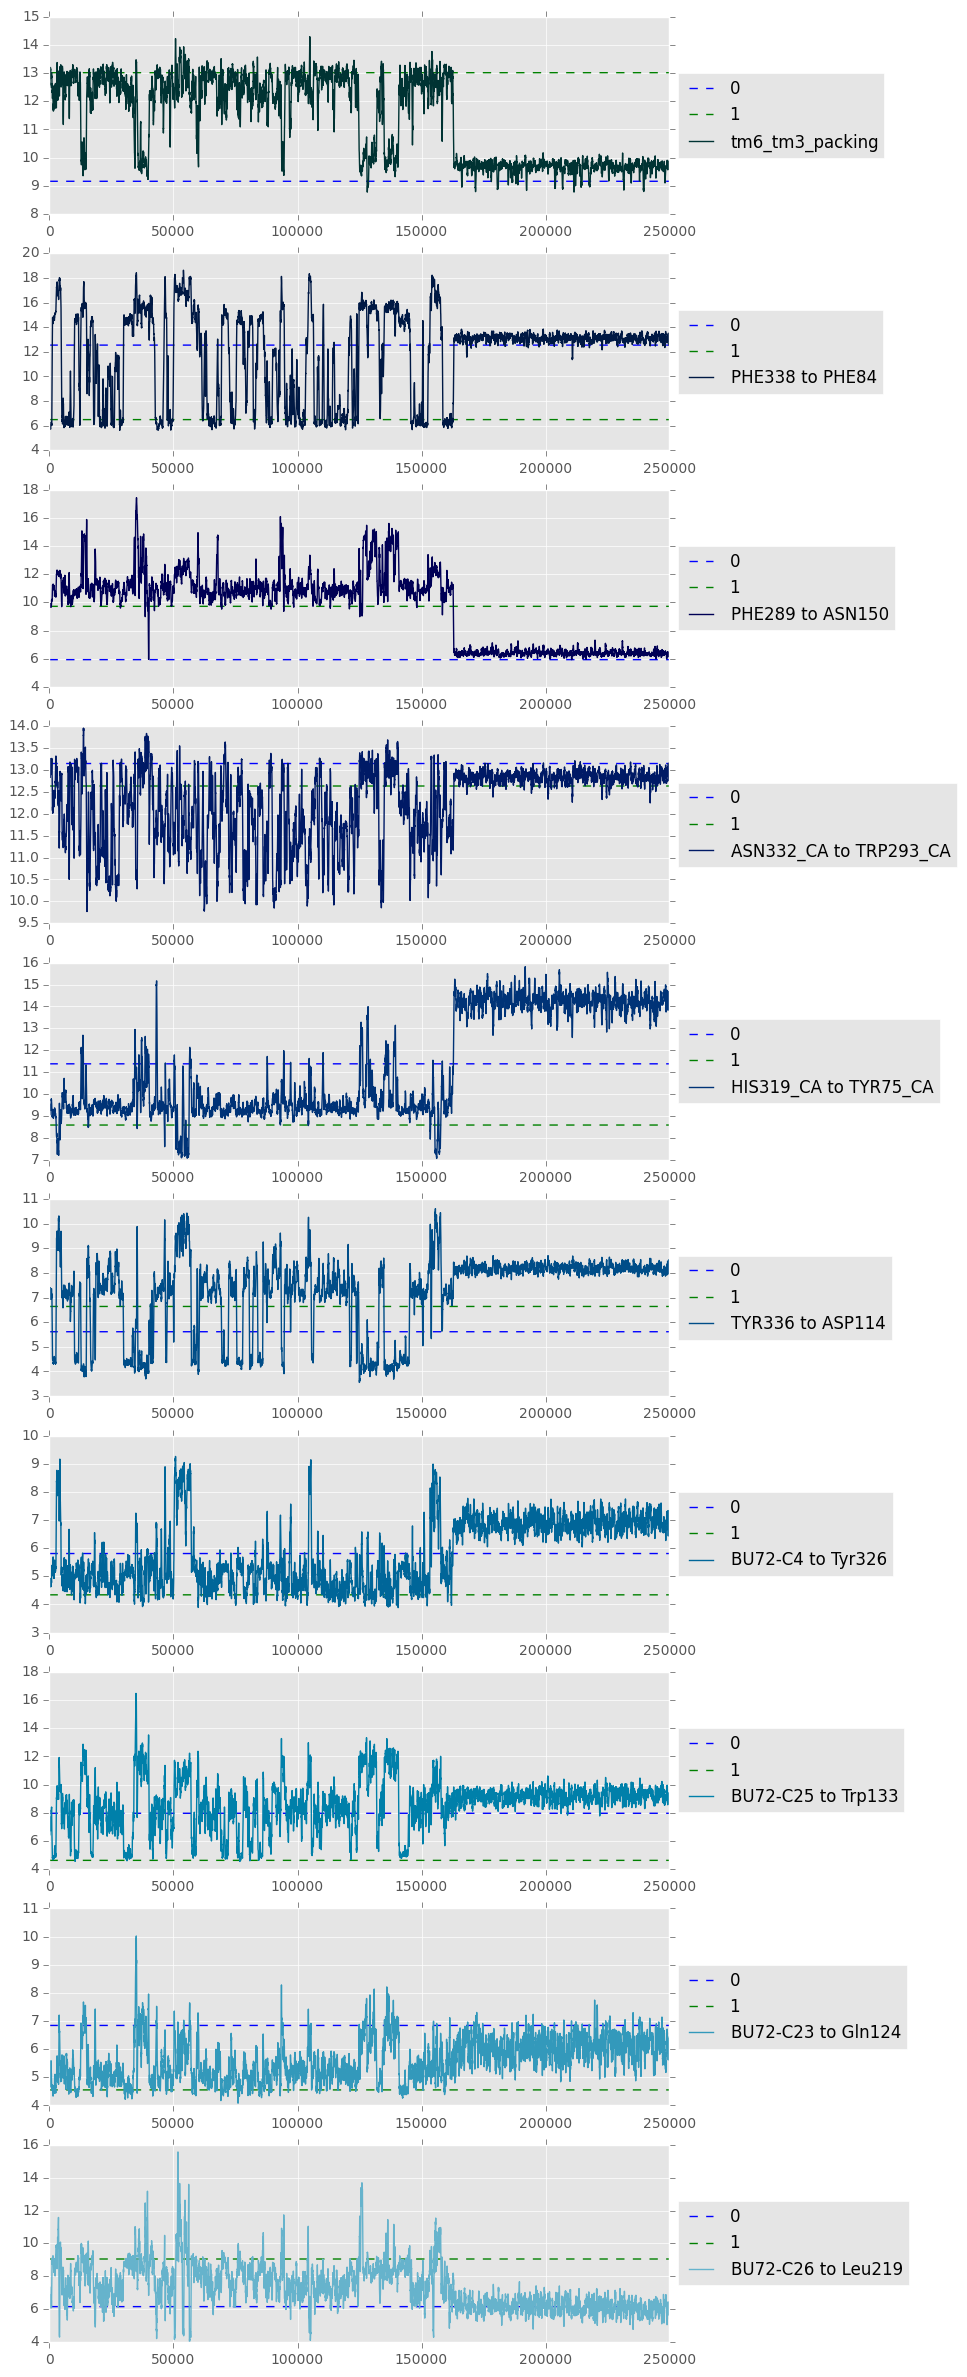

In [153]:
plmf = copy.deepcopy(protein_ligand_msm_featurized)
smoothing=10
names = plmf.columns.values.tolist()
for i, name in enumerate(names):
    if "LIG" in str(name):
        names[i] = "BU72" + name[3:]
    if "Lig900" in str(name):
        names[i] = "BU72" + name[6:]
plmf.columns = names
plmf.index = plmf.index.values * pp_msm_lag_time

names = ref_features.columns.values.tolist()
for i, name in enumerate(names):
    if "LIG" in str(name):
        names[i] = "BU72" + name[3:]
    if "Lig900" in str(name):
        names[i] = "BU72" + name[6:]
new_ref_df = copy.deepcopy(ref_features)
new_ref_df.columns=names

plot_features = plmf[["tm6_tm3_packing", "PHE338 to PHE84", "PHE289 to ASN150", "ASN332_CA to TRP293_CA", "HIS319_CA to TYR75_CA", "TYR336 to ASP114",  "BU72-C4 to Tyr326", "BU72-C25 to Trp133", "BU72-C23 to Gln124", "BU72-C26 to Leu219"]]
plot_df_rolling(plot_features.iloc[:10000], "%s/key_measurements_tIC5_2.png" %(analysis_dir), True, smoothing=smoothing, include_original=False, subplots=True, min_periods=None, ref_df=new_ref_df)
plt.show()

In [152]:
"%s/key_measurements_tIC5_2.png" %(analysis_dir)

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/key_measurements_tIC5_2.png'

In [93]:
[n for n in ref_features.columns.values.tolist() if "Lig" in n]

['Lig900-C6 to Gly325',
 'Lig900-C6 to Met151',
 'Lig900-C6 to Trp293',
 'Lig900-C6 to Ile296',
 'Lig900-C7 to His297',
 'Lig900-C7 to Val300',
 'Lig900-C7 to Gly325',
 'Lig900-C7 to Met151',
 'Lig900-C7 to Val236',
 'Lig900-C7 to Trp293',
 'Lig900-C7 to Ile296',
 'Lig900-C8 to His297',
 'Lig900-C8 to Val300',
 'Lig900-C8 to Gly325',
 'Lig900-C8 to Met151',
 'Lig900-C8 to Val236',
 'Lig900-C8 to Trp293',
 'Lig900-C8 to Ile296',
 'Lig900-C9 to His297',
 'Lig900-C9 to Val300',
 'Lig900-C9 to Tyr148',
 'Lig900-C9 to Met151',
 'Lig900-C9 to Lys233',
 'Lig900-C9 to Val236',
 'Lig900-C9 to Trp293',
 'Lig900-C9 to Ile296',
 'Lig900-C10 to His297',
 'Lig900-C10 to Val300',
 'Lig900-C10 to Tyr148',
 'Lig900-C10 to Met151',
 'Lig900-C10 to Val236',
 'Lig900-C10 to Ile296',
 'Lig900-C11 to Tyr148',
 'Lig900-C11 to Met151',
 'Lig900-C11 to Ile296',
 'Lig900-C23 to Ile144',
 'Lig900-C23 to Asp147',
 'Lig900-C23 to Gln124',
 'Lig900-C24 to Cys217',
 'Lig900-C24 to Trp318',
 'Lig900-C24 to Ile144',
 

In [ ]:
names

In [249]:
all_features_conc = pd.concat(all_traj_features, axis=0)

(73957,)


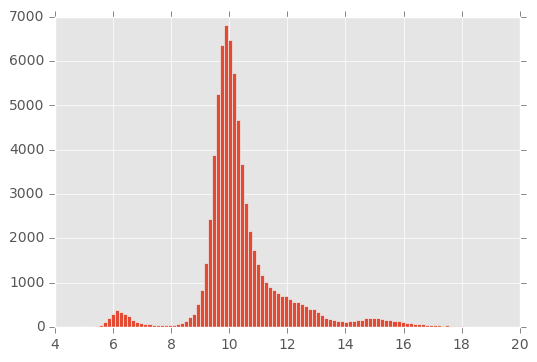

In [255]:
data = all_features_conc.loc[(all_features_conc[ 'TRP293-CD2 to PHE289-CG: Pi T'] == 1.) | (all_features_conc['TRP293-CG to PHE289-CG: Pi T'] == 1.)]["PHE289 to ASN150"].values
print(data.shape)
plt.hist(data, bins=100)
plt.show()

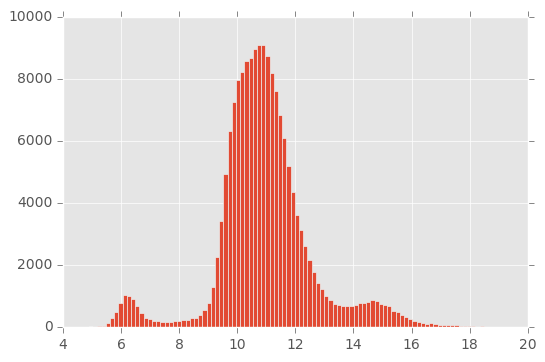

In [252]:
plt.hist(all_features_conc.loc[(all_features_conc[ 'TRP293-CD2 to PHE289-CG: Pi T'] == 0.) & (all_features_conc['TRP293-CG to PHE289-CG: Pi T'] == 0.)]["PHE289 to ASN150"].values, bins=100)
plt.show()

In [50]:
projected_features = verboseload(projected_features_dir)
tica_resampled_file = os.path.join(tica_dir, "tica_msm_lag-time%d_clusters%d_resampled.h5" %(lag_time, n_clusters))
resample_features_by_msm_equilibirum_pop(projected_features, bu72_pp_resampled_traj_to_frames, tica_resampled_file)
tica_resampled = verboseload(tica_resampled_file)
#plot_columns(tica_dir, tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_bu72_BP_MSM_", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False, reshape=True)

bu72_pp_resampled_traj_index_pairs = []
for traj in bu72_pp_resampled_traj_to_frames.keys():
    [bu72_pp_resampled_traj_index_pairs.append((traj, frame)) for frame in bu72_pp_resampled_traj_to_frames[traj]]

apo_pp_resampled_traj_index_pairs = []
for traj in apo_pp_resampled_traj_to_frames.keys():
    [apo_pp_resampled_traj_index_pairs.append((traj, frame)) for frame in apo_pp_resampled_traj_to_frames[traj]]

def create_features_eq_df(resampled_traj_index_pairs, feature_dfs, protein_top_features, ligand_top_features, pp_tica_resampled, ligand_tica_resampled, pp_pnas):
    all_dfs = []
    pp_features_eq = resample_features_by_msm_trajectory(protein_top_features, resampled_traj_index_pairs)
    all_dfs.append(pp_features_eq)
    if ligand_top_features is not None:
        ligand_features_eq = resample_features_by_msm_trajectory(ligand_top_features, resampled_traj_index_pairs)
        all_dfs.append(ligand_features_eq)
    pp_tica_eq = pd.DataFrame(pp_tica_resampled, columns=["mOR tIC.%d" %i for i in range(1,pp_n_components+1)])
    all_dfs.append(pp_tica_eq)
    if ligand_tica_resampled is not None:
        ligand_tica_eq = pd.DataFrame(ligand_tica_resampled, columns=["bu72 tIC.%d" %i for i in range(1,n_components+1)])
        all_dfs.append(ligand_tica_eq)
    pnas_eq = pd.DataFrame(pp_pnas, columns=sorted(feature_name_residues_dict.keys()))
    all_dfs.append(pnas_eq)
    features_eq = pd.concat(all_dfs, axis=1)
    features_eq.columns = [str(f) for f in features_eq.columns.values.tolist()]
    return features_eq

features_eq = create_features_eq_df(bu72_pp_resampled_traj_index_pairs, bu72_feature_dfs, protein_top_features_bu72, bu72_feature_dfs, bu72_pp_tica, tica_resampled, bu72_pp_pnas)
apo_features_eq = create_features_eq_df(apo_pp_resampled_traj_index_pairs, None, protein_top_features_apo, None, apo_pp_tica, None, apo_pp_pnas)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/tica_msm_lag-time50_clusters1000_resampled.h5"... (<type 'numpy.ndarray'>)
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/tica_msm_lag-time50_clusters1000_resampled.h5"...


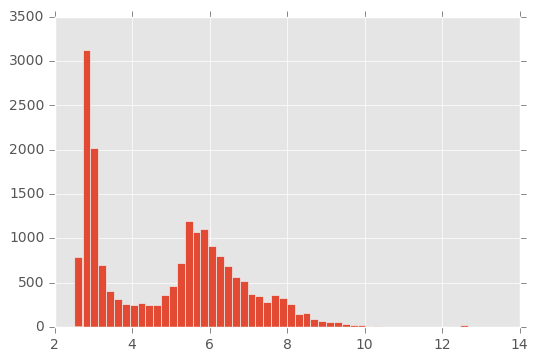

In [288]:
plt.clf()
plt.hist(features_eq["TRP293 to ALA240"].dropna().values, bins=50)
plt.show()

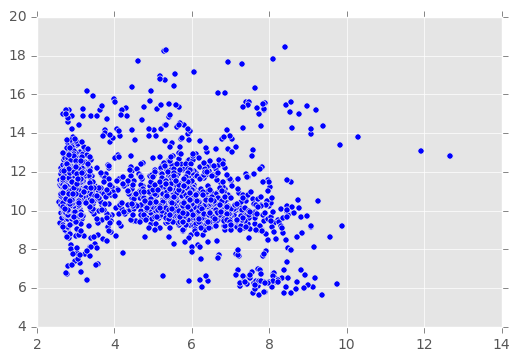

In [291]:
plt.scatter(features_eq["TRP293 to ALA240"].iloc[::10], features_eq["PHE289 to ASN150"].iloc[::10])
plt.show()

In [283]:
features_eq["tm6_tm3_packing"].values.tolist()

[12.57646918296814,
 12.67065167427063,
 13.055033683776855,
 13.17553997039795,
 13.060451745986938,
 12.951006889343262,
 12.779420614242554,
 12.844682931900024,
 13.0568528175354,
 13.655800819396973,
 14.07941222190857,
 12.786766290664673,
 12.845205068588257,
 12.42754578590393,
 13.274452686309814,
 13.017188310623169,
 13.569612503051758,
 12.661333084106445,
 12.34619140625,
 12.085063457489014,
 12.582987546920776,
 13.027698993682861,
 12.800136804580688,
 11.152828931808472,
 12.728899717330933,
 12.820432186126709,
 12.504225969314575,
 12.62604832649231,
 12.390893697738647,
 12.390893697738647,
 12.390893697738647,
 11.048014163970947,
 12.435698509216309,
 12.006551027297974,
 12.553101778030396,
 11.86745285987854,
 13.088663816452026,
 12.722252607345581,
 10.76681137084961,
 11.410406827926636,
 12.292461395263672,
 12.099236249923706,
 12.292461395263672,
 11.988763809204102,
 10.767406225204468,
 12.258142232894897,
 13.454728126525879,
 12.957249879837036,
 13.37

In [286]:
plt.hist(pd.concat(all_traj_features, axis=0)["Trp293 To Ala240"].values, bins=50)
plt.show()

KeyError: 'Trp293 To Ala240'

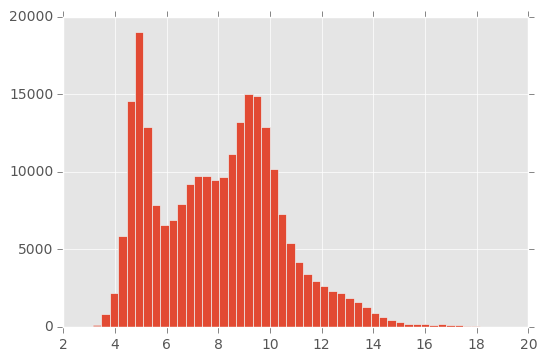

In [131]:
plt.clf()
plt.hist(pd.concat(bu72_feature_dfs, axis=0)["Lig900-C25 to Trp133"].values, bins=50)
plt.show()

In [133]:
import sklearn
lig_names = bu72_feature_dfs[0].columns.values.tolist()
a = features_eq[lig_names].values
print(a.shape)
b = features_eq[aromatic_names].values
print(b.shape)
x = np.nan_to_num(np.hstack([a, b]))
pm = compute_pearson_matrix(x, features_eq[["tm6_tm3_packing", "PHE289 to ASN150"]].values)
print(x.shape)
pmdf = pd.DataFrame(pm, columns=["a" , "b"], index=(lig_names+aromatic_names))
pmdf["a"].loc[[n for n in pmdf.index.values.tolist() if "trp" in n.lower() or "tyr" in n.lower() or "phe" in n.lower() or "his" in n.lower()]].dropna().sort(ascending=False,inplace=False)

(19953, 222)
(19953, 64)
(19953, 286)


Lig900-C11 to Tyr148                    0.369477
Lig900-C9 to Tyr148                     0.364049
Lig900-C10 to Tyr148                    0.359316
Lig900-C1 to Tyr148                     0.357582
Lig900-O1 to Tyr148                     0.354937
Lig900-C12 to Tyr148                    0.340705
Lig900-C2 to Tyr148                     0.300105
Lig900-C5 to Trp293                     0.299246
LIG-C6 to TRP293-CD2: Pi T              0.263763
LIG-C6 to TRP293-CD2: Pi T              0.263763
LIG-C6 to TRP293-CD2: Pi T              0.263763
LIG-C6 to TRP293-CD2: Pi T              0.263763
Lig900-C13 to Tyr148                    0.255071
Lig900-N1 to Tyr148                     0.222575
LIG-C6 to TRP318-CD2: Pi T              0.200917
LIG-C6 to TRP318-CD2: Pi T              0.200917
LIG-C6 to TRP318-CD2: Pi T              0.200917
LIG-C6 to TRP318-CD2: Pi T              0.200917
Lig900-C7 to His297                     0.198842
Lig900-N2 to Tyr148                     0.193448
Lig900-C3 to Tyr148 

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [170]:
#activating_features = ["LIG-C19 to TRP318-CG: Pi T", "LIG-C19 to TRP318-CD2: Pi T", "LIG-C22 to HIS297-ND1: Pi T", "LIG-C19 to TYR326-CG: Pi T", "LIG-C19 to TYR326-CG: Pi Parallel", "LIG-C19 to HIS297-ND1: Pi T"]
activating_features = ["TRP293-CG to TYR326-CG: Pi T"]
data_indices = []
for f in activating_features:
    data_indices += features_eq.loc[features_eq[f] == 10].index.values.tolist()
data = features_eq.iloc[list(set(data_indices))]["PHE289 to ASN150"]
#data = features_eq.loc[(features_eq['LIG-C19 to TRP318-CG: Pi T'] == 10) | (features_eq['LIG-C19 to TRP318-CD2: Pi T'] == 10)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "Activating Features" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_7A.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

KeyError: 'TRP293-CG to TYR326-CG: Pi T'

(19179,)


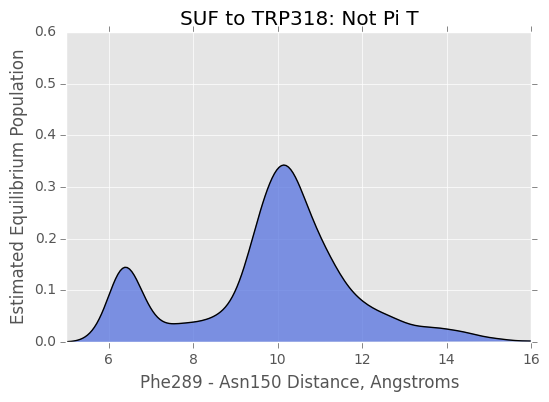

In [236]:
data = features_eq.loc[(features_eq['LIG-C19 to TRP318-CG: Pi T'] == 0) & (features_eq['LIG-C19 to TRP318-CD2: Pi T'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "bu72 to TRP318: Not Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_7A.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

(6792,)


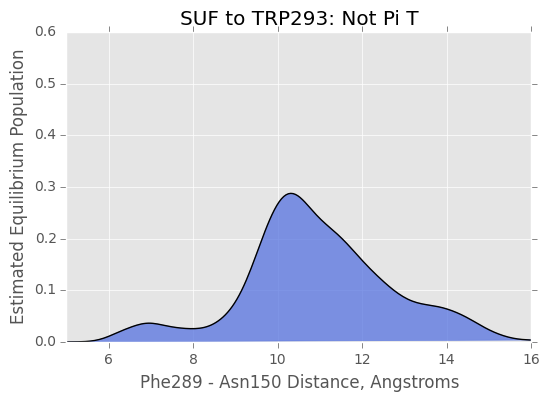

In [234]:
data = features_eq.loc[(features_eq['LIG-C22 to TRP293-CD2: Pi T'] == 0) & (features_eq['LIG-C22 to TRP293-CG: Pi T'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "bu72 to TRP293: Not Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_7A.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

In [69]:
features_eq.columns.values.tolist()

['MET281_CA to ILE107_CA',
 'ILE71 to TYR128',
 'THR67_CA to ILE69_CA',
 'HIS319_CA to THR67_CA',
 'ASN332_CA to TRP293_CA',
 'ALA68 to TYR128',
 'SER329_CA to VAL81_CA',
 'THR208_CA to CYS217_CA',
 'LEU176_CA to HIS171_CA',
 'ASN150_CA to ASP147_CA',
 'ILE234_CA to PHE239_CA',
 'TRP293 to ALA240',
 'ILE278_CA to LEU283_CA',
 'CYS321_CA to PRO295_CA',
 'TYR336_CA to VAL285_CA',
 'LYS174 to PHE178',
 'VAL300_CA to LYS233_CA',
 'PHE338_CA to ARG280_CA',
 'LEU231_CA to VAL236_CA',
 'TYR336 to PHE289',
 'ARG280_CA to LEU283_CA',
 'ASN150_CA to SER145_CA',
 'PHE338 to PHE84',
 'VAL66_CA to ILE69_CA',
 'ALA175_CA to ILE167_CA',
 'LYS174_CA to HIS171_CA',
 'VAL334_CA to VAL89_CA',
 'TYR336 to ASP114',
 'LEU232_CA to PHE237_CA',
 'THR67_CA to ILE71_CA',
 'TYR75_CA to LEU121_CA',
 'LEU339_CA to VAL282_CA',
 'VAL66_CA to ILE71_CA',
 'SER329_CA to ASP114_CA',
 'THR312_CA to THR315_CA',
 'VAL66 to THR70',
 'LEU335_CA to VAL284_CA',
 'HIS319_CA to TYR75_CA',
 'PHE237_CA to ILE234_CA',
 'TYR336_CA t

In [86]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

we are operating on biox3


(7581,)


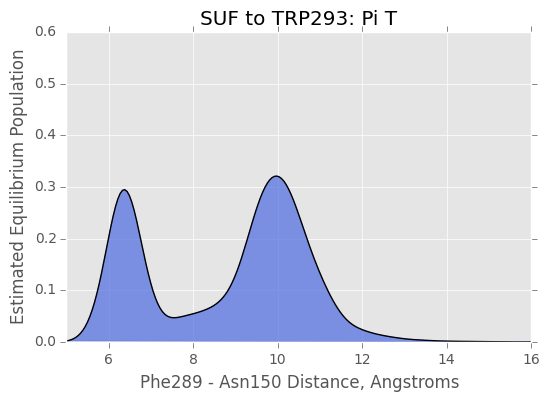

In [119]:
data = features_eq.loc[(features_eq['LIG-C22 to TRP293-CD2: Pi T'] == 10) | (features_eq['LIG-C22 to TRP293-CG: Pi T'] == 10)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "bu72 to TRP293: Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

(1778,)


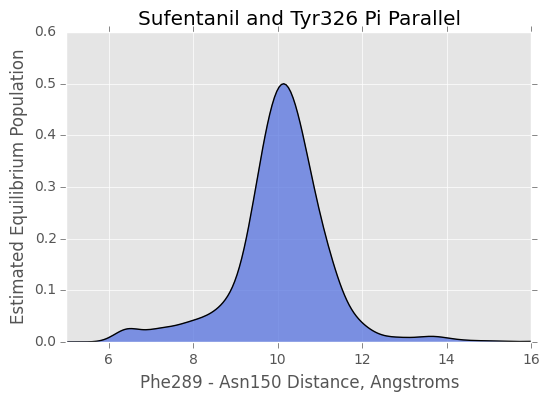

In [114]:
title = "bu72entanil and Tyr326 Pi Parallel" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C22 to TYR326-CG: Pi Parallel'] == 10)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

(18202,)


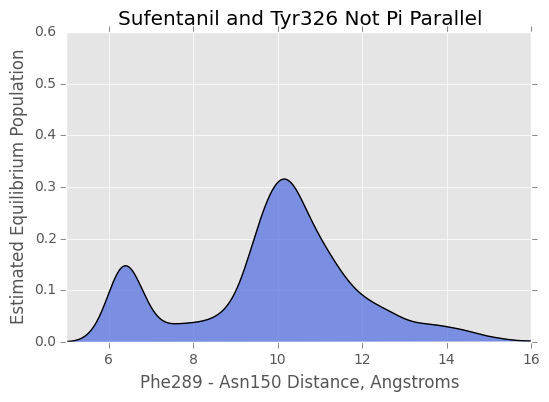

In [115]:
title = "bu72entanil and Tyr326 Not Pi Parallel" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C22 to TYR326-CG: Pi Parallel'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

(19409,)


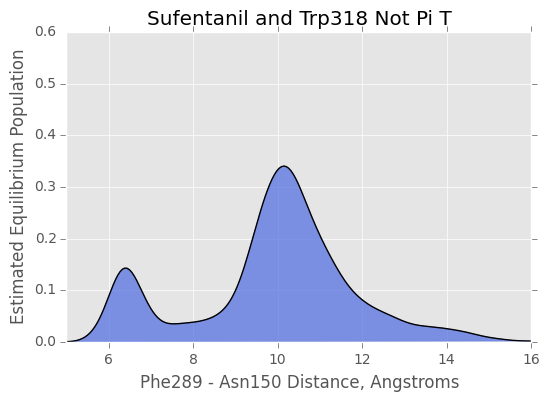

In [89]:
title = "bu72entanil and Trp318 Not Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_2.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C19 to TRP318-CG: Pi T'] == 0) & (features_eq['LIG-C19 to TRP318-CD2: Pi T'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

(6889,)


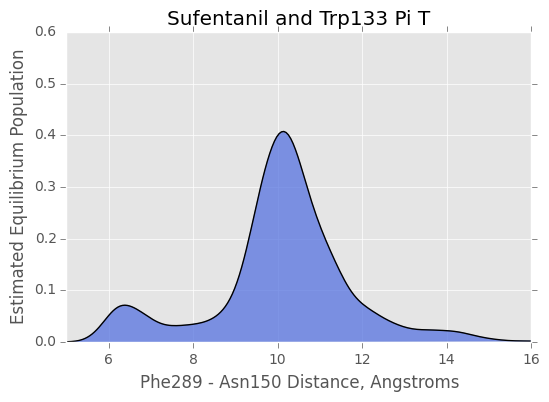

In [88]:
title = "bu72entanil and Trp133 Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_2.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C19 to TRP133-CG: Pi Parallel'] == 1) | (features_eq['LIG-C19 to TRP133-CD2: Pi T'] == 1)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

In [107]:
data.shape

(2982,)

In [ ]:
#pm = compute_pearson_matrix(features_eq["tm6_tm3_packing"].values.reshape((-1,1)), features_eq.values).reshape((-1,1))
titles_i = ["tm6_tm3_packing"] + pp_tica_eq.columns.values.tolist() + list(set(pp_features_eq.columns.values.tolist()))
titles_j = list(set(bu72_features_eq.columns.values.tolist())) + bu72_tica_eq.columns.values.tolist()
pm = compute_pearson_matrix(features_eq[titles_i].values, features_eq[titles_j].values)
pmdf = pd.DataFrame(pm, index=titles_i, columns=titles_j)

In [ ]:
pmdf.loc["tm6_tm3_packing"].sort(inplace=False)

In [ ]:
try:
    plt.rcParams['xtick.labelsize'] = 6.
    plt.rcParams['ytick.labelsize'] = 8.
    g = sns.clustermap(pmdf, figsize=(10,10))
    plt.show()
except:
    pass

In [ ]:
plt.hexbin(features_eq["Lig900-N1 to Tyr326"], features_eq["tm6_tm3_packing"])

In [ ]:
pmdf.loc[[str(f) for f in bu72_features_eq.columns.values.tolist()]].abs().sort("correlation", ascending=False,inplace=False).iloc[:50].plot(kind='barh')

In [ ]:
import seaborn as sns
from scipy.stats import kendalltau
def hexbin(x, y, color, gridsize=25, n_colors=10, **kwargs):
    cmap = sns.light_palette(color, n_colors=n_colors, as_cmap=True)
    #cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=gridsize, cmap=cmap, **kwargs)
    
g = sns.PairGrid(features_eq[["tm6_tm3_packing", "rmsd_npxxy_inactive", "mOR tIC.4", "mOR tIC.6", "(MET281_CA, MET161_CA)", "(Lig900-C19, Gln124)", "(Lig900-C16, Val300)", "(Lig900-C8, Met151)", "(Lig900-N1, Tyr326)"]])# "(GLY82, TYR326)", "(TYR326, ASP147)", "bu72 tIC.3", "(Lig900-N1, Tyr326)", "(Lig900-C4, Tyr326)", "(Lig900-C20, Gln124)", "(Lig900-C6, Trp293)"]])
g.map_diag(plt.hist, bins=100)
#g.map_upper(sns.kdeplot, cmap="Blues_d", n_levels=10, shade=True, shade_lowest=False)
g.map_upper(plt.scatter, s=0.1, color="purple")
g.map_lower(plt.scatter, s=0.1, color="purple")

In [109]:
def custom_lim_finder(values):
    mins = np.min(values, axis=0)
    maxs = np.max(values, axis=0)
    stds = np.std(values, axis=0)
    custom_lims = [[mins[i] - 1.*stds[i], maxs[i] + 1.*stds[i]] for i in range(0,len(mins))]
    return custom_lims

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
#titles_i = ["tm6_tm3_packing", "mOR tIC.2"] + [str(f) for f in bu72_pp_tIC_features[1]][:5] + ["bu72 tIC.3"] + [str(f) for f in all_tIC_features[2]][:5]
titles_i = ["tm6_tm3_packing"] + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + ["bu72 tIC.%d" %i for i in range(1,n_components+1)]
features_eq_vals = features_eq[titles_i].values
mins = np.min(features_eq_vals, axis=0)
maxs = np.max(features_eq_vals, axis=0)
stds = np.std(features_eq_vals, axis=0)
custom_lims = [[mins[i] - 0.5*stds[i], maxs[i] + 0.5*stds[i]] for i in range(0,len(mins))]
jointplots(features_eq_vals, analysis_dir, titles = titles_i, main = "mOR MSM", refcoords_file = None, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=5., custom_lims=custom_lims, n_levels=15, worker_pool=None, parallel=True)

In [ ]:
from jointplot_d3 import *
titles_i = ["tm6_tm3_packing", "mOR tIC.2"] + [str(f) for f in bu72_pp_tIC_features[1]] + ["mOR tIC.3"] + [str(f) for f in all_tIC_features[2]]
tica_resampled = np.vstack([verboseload(bu72_pnas_resampled_file)[::1,], verboseload(apo_pnas_resampled_file)[::1,]])
mins = np.min(tica_resampled, axis=0)
maxs = np.max(tica_resampled, axis=0)
stds = np.std(tica_resampled, axis=0)
custom_lims = [[mins[i] - 1.*stds[i], maxs[i] + 1.*stds[i]] for i in range(0,len(mins))]
jointplots(features_eq[titles_i], analysis_dir, titles = titles_i, main = "mOR MSM", refcoords_file = None, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=5., custom_lims=custom_lims, n_levels=15)

In [ ]:
all_tIC_features[0]

In [ ]:
"""
['bu72_reimaged_rep_100.h5', 'bu72_reimaged_rep_119.h5', 'bu72_reimaged_rep_179.h5', 'bu72_reimaged_rep_184.h5', 'bu72_reimaged_rep_186.h5', 'bu72_reimaged_rep_24.h5', 'bu72_reimaged_rep_255.h5', 'bu72_reimaged_rep_27.h5', 'bu72_reimaged_rep_56.h5', 'bu72_reimaged_rep_58.h5', 'bu72_reimaged_rep_59.h5', 'bu72_reimaged_rep_63.h5', 'bu72_reimaged_rep_64.h5', 'bu72_reimaged_rep_83.h5', 'bu72_rep_139.h5', 'bu72_rep_84.h5']"""
bu72_traj_names = [os.path.basename(t) for t in trajs if "bu72" in t]
traj_idx = bu72_traj_names.index('bu72_rep_139.h5')
f = all_traj_features[traj_idx][["tm6_tm3_packing", "(Lig900-C20, Gln124)", "(Lig900-C3, Trp293)"]]
#f = protein_ligand_msm_featurized[f.columns.values]
pd.rolling_mean(f[f.columns.values[0]], window=50).plot()

In [ ]:
pd.rolling_mean(f[f.columns.values[1]], window=50).plot()

In [ ]:
pmdf.index.values

In [ ]:
bu72_pp_pnas.T[1,:].shape

In [ ]:
from pandas.tools.plotting import scatter_matrix
#df = pd.concat([pp_features_eq, bu72_features_eq], axis=1)[["(MET281_CA, MET161_CA)", "(Lig900-N1, Tyr326)"] + [str(f) for f in bu72_pp_tIC_features[2][:2] +  all_tIC_features[2][:2]]]
df = features_eq[all_features[0]]
sm = scatter_matrix(df.iloc[::100], figsize=(6, 6), diagonal='kde')
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
plt.show()

In [126]:
features_eq.loc[(features_eq["TRP293-CD2 to PHE289-CG: Pi Parallel"] == 1) | (features_eq["TRP293-CD2 to PHE289-CG: Pi T"] == 1) | (features_eq["TRP293-CG to PHE289-CG: Pi Parallel"] == 1) | (features_eq["TRP293-CG to PHE289-CG: Pi T"] == 1)].shape

(6318, 302)

In [ ]:
import seaborn as sns



g = sns.PairGrid(features_eq[all_features[0]])
g.map_upper(sns.jointplot, kind="hex", stat_func=kendalltau, color="#4CB391")
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
#g.map_lower(sns.kdeplot, cmap="Blues_d", n_levels=5, shade=True, shade_lowest=False)
#g.map_diag(sns.kdeplot)
#g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [90]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *
keep_steps = 100000
subsample = 100
ligand_msm_featurized_traj = resample_features_by_msm_trajectory(ligand_top_features, msm_traj_index_pairs[0:keep_steps])
protein_msm_featurized_traj = resample_features_by_msm_trajectory(protein_top_features_bu72, msm_traj_index_pairs[0:keep_steps])
protein_msm_tica_traj = resample_features_by_msm_trajectory(bu72_tica_dfs, msm_traj_index_pairs[0:keep_steps])
protein_msm_pnas_traj = resample_features_by_msm_trajectory(bu72_pnas_dfs, msm_traj_index_pairs[0:keep_steps])
bu72_msm_tica_traj = resample_features_by_msm_trajectory(tica_dfs, msm_traj_index_pairs[0:keep_steps])


protein_ligand_msm_featurized = pd.concat([ligand_msm_featurized_traj, protein_msm_featurized_traj, protein_msm_tica_traj, protein_msm_pnas_traj, bu72_msm_tica_traj], axis=1)
plmf = protein_ligand_msm_featurized.iloc[::10]

In [ ]:
plt.hist(pd.concat(all_traj_features))

In [136]:
all_traj_features_np = [f.values for f in all_traj_features]
cluster_features_averages = calculate_cluster_averages_per_feature(bu72_pp_clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_traj_features[0].columns)

In [103]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

#intermediates = cluster_features_averages.loc[(cluster_features_averages["rmsd_npxxy_active"] < 0.3)].index.values# & (cluster_features_averages["Lig1-C9 to Trp318"] < 6.)].index.values
intermediates = cluster_features_averages.loc[(cluster_features_averages["PHE338 to PHE84"] < 8.) & (cluster_features_averages["tm6_tm3_packing"] < 10.) & (cluster_features_averages["rmsd_npxxy_active"] < 5.)].index.values
intermediates = intermediates.tolist()
print(intermediates)
counts = [len(bu72_pp_clusters_map[i]) for i in range(0, pp_n_clusters)]
for c in np.argsort(-1.0*np.array(counts)):
    if c in intermediates:
        print(c)
#print(intermediates)
#find_most_populated_intermediates(bu72_pp_msm, intermediates)

we are operating on biox3
[167, 450, 525, 873, 1106, 1239]
450
873
1239
525
1106
167


In [71]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
intermediates = cluster_features_averages.loc[(cluster_features_averages["TYR336 to PHE289"] > 12.)].index.values
#intermediates = cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 13.) & (cluster_features_averages["PHE289 to ASN150"] > 16.) & (cluster_features_averages["TYR336 to PHE289"] > 12.)].index.values# & (cluster_features_averages["Lig1-C9 to Trp318"] < 6.)].index.values
print(intermediates)
find_most_populated_intermediates(bu72_pp_msm, intermediates)

we are operating on biox3
[  11   30   90   96  134  153  255  406  408  417  418  436  441  533  571
  639  723  740  780  864  906  930  973  976 1005 1085 1095 1099 1138 1263
 1372 1412 1413 1424 1440]
0.0031336103252
[ 533  436 1095 1085 1099  973  418  906 1005   30 1412  976  408  639  780
 1263  864   11  134   90 1413  406 1424  153  723 1372  930  417  571  255
  740  441   96 1138]


array([ 533,  436, 1095, 1085, 1099,  973,  418,  906, 1005,   30, 1412,
        976,  408,  639,  780, 1263,  864,   11,  134,   90, 1413,  406,
       1424,  153,  723, 1372,  930,  417,  571,  255,  740,  441,   96,
       1138])

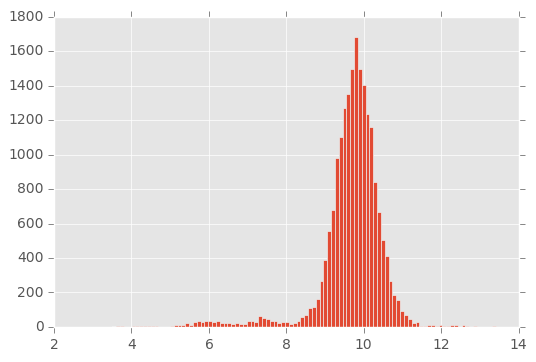

In [263]:
plt.hist(features_eq["TYR336 to VAL286"].values, bins=100)
plt.show()

In [44]:

intermediate_actives = cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 0.) & (cluster_features_averages["TYR336 to PHE289"] > 9.)].index.values
msm_intermediate_actives = np.concatenate(bu72_pp_msm.partial_transform(intermediate_actives))
order = np.argsort(bu72_pp_msm.populations_[msm_intermediate_actives])
print(np.sum(bu72_pp_msm.populations_[msm_intermediate_actives][order]))
print(intermediate_actives[order])

0.057834507177
[ 644  516  408  541  779 1477 1471  417  926  906 1050 1169  145 1228  727
 1082 1175 1349   12 1035 1283  734 1414  886  787 1017  331 1134  237 1103
  753  488 1408  602  892 1099  546 1074  381  372 1085  696 1307  223   73
  478  481 1122 1117  523 1251  235 1078  156   86 1412  263  193 1242  443
  663  192  493  436  767 1221  449  250  136 1022   44   90  821 1263 1379
 1127   45  164  720  550  374  870  903   10  132  321  560  741 1246 1320
  346  159 1092  941  652  531  714 1332 1083  563  483  301 1155  917  270
 1063  608  217  174  435  140 1129   55 1046  934  609  198  887 1005 1027
  839  622  459  715 1328  106 1000  469]


In [ ]:
plt.hist(features_eq["TYR336 to PHE289"], bins=100)
plt.show()

In [ ]:
clus

In [ ]:
plt.clf()
plt.hist(cluster_features_averages["tm6_tm3_packing"].dropna().values, bins=50)
plt.show()

In [ ]:
[n for n in features_eq.columns.values.tolist() if "318" in n]

In [ ]:
plt.clf()
plt.hist(features_eq['Lig1-O2 to Trp318'], bins=50)
plt.show()

In [ ]:
bu72_msm.inverse_transform(np.argsort(-1.*bu72_msm.populations_))

In [ ]:
bu72_msm.populations_[np.argsort(bu72_msm.populations_)]

In [105]:

all_traj_features_np = [f.values for f in all_traj_features_apo]

cluster_features_averages = calculate_cluster_averages_per_feature(apo_pp_clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_traj_features_apo[0].columns)

intermediate_actives = cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] < 10.) & (cluster_features_averages["PHE338 to PHE84"] < 10.)].index.values
print(intermediate_actives)
msm_intermediate_actives = np.concatenate(apo_pp_msm.partial_transform(intermediate_actives))
order = np.argsort(apo_pp_msm.populations_[msm_intermediate_actives])
print(np.sum(apo_pp_msm.populations_[msm_intermediate_actives][order]))
print(intermediate_actives[order])

#tpt_paths_features = []
#for tpt_path in inv_tpt_paths:
#    tpt_paths_features.append(cluster_features_averages.iloc[tpt_path])

[ 145  404  616  643 1343]
0.0224830902305
[ 616  643  145 1343  404]


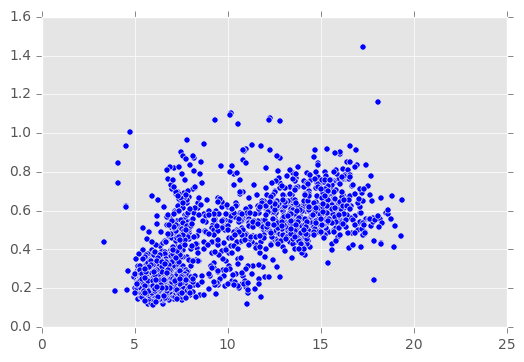

In [107]:
plt.scatter(pd.concat(all_traj_features_apo)["PHE338 to PHE84"].iloc[::100], pd.concat(all_traj_features_apo, axis=0)["rmsd_npxxy_active"].iloc[::100])
plt.show()

In [99]:
prot_features = list(set([str(g) for l in bu72_pp_tIC_features for g in l]))
f1 = pd.concat([f*10. for f in protein_top_features_apo], axis=0)
f2 = pd.concat([f for f in apo_tica_dfs])
f3 = pd.concat([f for f in apo_pnas_dfs])
prot_lig_features = pd.concat([f1,f2,f3],axis=1)
all_traj_features_apo = [pd.concat([protein_top_features_apo[i], apo_tica_dfs[i], apo_pnas_dfs[i]], axis=1) for i in range(0, len(apo_tica_dfs))]



all_traj_features_np = [f.values for f in all_traj_features_apo]
cluster_features_averages = calculate_cluster_averages_per_feature(apo_pp_clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_traj_features_apo[0].columns)

intermediate_actives = cluster_features_averages.loc[(cluster_features_averages["PHE338 to PHE84"] < 8.) & (cluster_features_averages["tm6_tm3_packing"] < 10.)].index.values
msm_intermediate_actives = apo_pp_msm.partial_transform(intermediate_actives)[0]
order = np.argsort(bu72_pp_msm.populations_[msm_intermediate_actives])
print(bu72_pp_msm.populations_[msm_intermediate_actives][order])
print(intermediate_actives)
print(intermediate_actives[order])

[  1.81188241e-05   3.32108181e-05   5.01206025e-05   9.73628398e-05]
[ 145  404  616 1343]
[ 616 1343  145  404]


In [95]:
cluster_features_averages["TYR336 to ASP114"]

0        65.677464
1        69.520236
2        79.270547
3        59.766544
4              NaN
5        57.286602
6        69.754444
7        68.328216
8        82.933073
9       104.385186
10       44.761265
11             NaN
12       43.976968
13       66.442571
14       86.173685
15             NaN
16       74.521824
17       68.131123
18             NaN
19             NaN
20       93.740982
21       70.609233
22       55.465408
23       81.117155
24       88.576160
25       82.480401
26       62.476880
27       72.161688
28             NaN
29       42.673401
30       39.338964
31       61.334750
32       79.194021
33       70.451573
34       66.761935
35       93.980086
36       66.967391
37       73.008532
38             NaN
39       63.194643
40       59.794129
41       67.617188
42       64.135324
43       81.603237
44       56.603869
45             NaN
46       81.928826
47       68.521731
48       72.111999
49       55.504948
50       86.778290
51       68.524914
52       66.

In [138]:
graph_file = "%s/bu72_clusters_%d_msm_lag_time%d_graph_3.graphml" % (tica_dir, n_clusters, pp_msm_lag_time)
bu72_cluster_attributes = {}
for i, title in enumerate(["mOR tIC.%d" %i for i in range(1,n_components+1)]):
    bu72_cluster_attributes[title] = cluster_features_averages[title].values
attributes = ["tm6_tm3_packing", "rmsd_npxxy_inactive", 'PHE338 to PHE84', "HIS319_CA to TYR75_CA", "MET281_CA to ILE107_CA", "PHE289 to ASN150", "TYR336 to PHE289", "PHE338 to PHE84", "TYR336 to ASP114"]
for attribute in attributes:
    bu72_cluster_attributes[attribute] = cluster_features_averages[attribute].values
msm_attributes = {'eq_pops': bu72_pp_msm.populations_}
construct_graph(bu72_pp_msm_file, bu72_pp_clusterer_file, pp_n_clusters, 5, 5, graph_file, inactive = None, active = None, pnas_clusters_averages = None, tica_clusters_averages = None, docking=None, macrostate = None, msm_attributes=msm_attributes, cluster_attributes=bu72_cluster_attributes)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer1500.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_msm_lag-time25_prior-counts0.0_clusters1500.h5"...
1032


In [134]:
len(bu72_pp_msm.mapping_.keys())

1032

In [131]:
graph_file

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/bu72_clusters_1000_msm_lag_time25_graph.graphml'

In [160]:
bu72_cluster_attributes["tm6_tm3_packing"]

array([[         nan,          nan,          nan],
       [ 12.85214553,   4.55963795,   9.69313495],
       [         nan,          nan,          nan],
       ..., 
       [ 13.12998482,   6.52489952,  12.59240082],
       [ 12.05107178,   5.65915885,  10.62385897],
       [ 12.56291899,   5.28355549,   9.0137017 ]])

In [ ]:
tpt_paths_features[6]["Lig900-N1 to Tyr326"]

In [ ]:
print(cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 12.) & (cluster_features_averages["(PHE156, SER196)"] > 9.5) & (cluster_features_averages["(PHE156, SER196)"] < 10.5)].index)
print(cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 12.) & (cluster_features_averages["(PHE156, SER196)"] > 6.) & (cluster_features_averages["(PHE156, SER196)"] < 7.)].index)

In [ ]:
print(cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] < 11.) & (cluster_features_averages["(ASP114, TYR336)"] > 8.)& (cluster_features_averages["(Lig900-C19, Ile322)"] > 5.)].index)

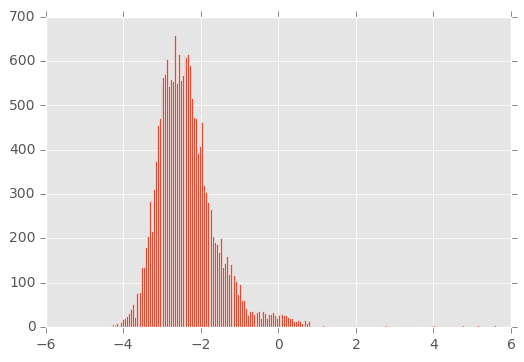

In [140]:
plt.hist(features_eq["mOR tIC.4"], bins=200)
plt.show()

In [ ]:
cluster_features_averages.loc[(cluster_features_averages["mOR tIC.6"] > 4.)].index

In [ ]:
cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] < 10.) & (cluster_features_averages["rmsd_npxxy_inactive"]<0.3)].index

In [ ]:
cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 13.) & (cluster_features_averages["rmsd_npxxy_inactive"]<0.3)].index

In [ ]:
cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 12.) & (cluster_features_averages["(VAL89_CA, TYR336_CA)"] >11.5)].index

In [ ]:
g = sns.PairGrid(prot_lig_features[["tm6_tm3_packing", "tIC.3", "(Lig900-C20, Gln124)", "(Lig900-C3, Trp293)"]])
g.map_diag(plt.hist, bins=100)
#g.map_upper(sns.kdeplot, cmap="Blues_d", n_levels=10, shade=True, shade_lowest=False)
g.map_upper(hexbin, color="purple", n_colors=30, gridsize=30)
g.map_lower(plt.scatter, s=.1)

In [ ]:
protein_top_features[0].iloc[::3]

In [ ]:
import seaborn as sns

In [ ]:
pmdf

In [ ]:
try:
    plt.rcParams['xtick.labelsize'] = 6.
    plt.rcParams['ytick.labelsize'] = 8.
    g = sns.clustermap(pmdf, figsize=(10,10))
    plt.show()
except:
    pass

In [ ]:
prot_lig_features.plot(kind='scatter', x="(MET281_CA, MET161_CA)", y= "(Lig900-C10, Val236)")

In [ ]:
plmf.columns.values

In [115]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
if not os.path.exists("%s/rfr_r2_scores.h5" %analysis_dir):
    r2_scores, importances = compute_rf_matrix(tica_resampled, bu72_pp_tica, n_trees=500, n_folds=10)
    verbosedump(r2_scores, "%s/rfr_r2_scores.h5" %analysis_dir)
    verbosedump(importances, "%s/rfr_importances.h5" %analysis_dir)
else:
    r2_scores = verboseload("%s/rfr_r2_scores.h5" %analysis_dir)
    importances = verboseload("%s/rfr_importances.h5" %analysis_dir)

Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/rfr_r2_scores.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/rfr_importances.h5"... (<type 'numpy.ndarray'>)


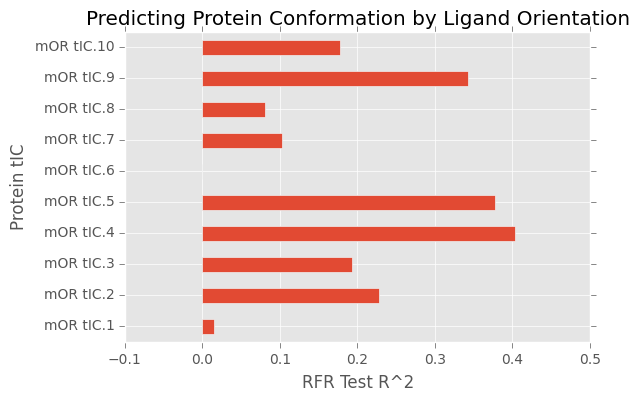

In [116]:
r2_scores_df = pd.Series(r2_scores, index=["mOR tIC.%d" %i for i in range(1, len(r2_scores)+1)])
title = "Predicting Protein Conformation by Ligand Orientation"
r2_scores_df.plot(kind='barh', title=title)
plt.xlabel("RFR Test R^2")
plt.ylabel("Protein tIC")
plt.savefig("%s/%s.pdf" %(analysis_dir, title))
plt.show()

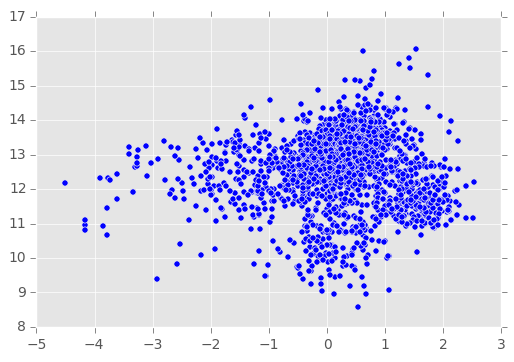

In [63]:
plt.scatter(features_eq["mOR tIC.10"].iloc[::10], features_eq["tm6_tm3_packing"].iloc[::10])
plt.show()

In [160]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
#if not os.path.exists("%s/rfr_r2_scores.h5" %analysis_dir):
#pd.concat([pp_features_eq, bu72_features_eq, pp_tica_eq, bu72_tica_eq, bu72_pnas_eq], axis=1)
#y = pd.concat([pp_tica_eq, bu72_pnas_eq["tm6_tm3_packing", "rmsd_npxxy_active"]], axis=1)
y = features_eq[["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]]

#y = features_eq[protein_top_features[0].columns.values.tolist() + sorted(feature_name_residues_dict.keys()) + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + [n for n in aromatic_names if "lig" not in n.lower()]]
#x = features_eq[[str(f) for f in new_feature_names]]
x = features_eq[[str(n) for n in all_ligand_feature_names] + ["bu72 tIC.%d" %i for i in range(1, n_components+1)]]

#if not os.path.exists("%s/all_features_rfc_scores.h5" %analysis_dir):
    #print("hi")
scores, importances = compute_rf_matrix(x.values, y.values, n_trees=500, n_folds=10)
verbosedump(scores, "%s/all_features_rfc_scores.h5" %analysis_dir)
verbosedump(importances, "%s/all_features_rfc_importances.h5" %analysis_dir)
#else:
#    scores = verboseload("%s/all_features_rfc_scores.h5" %analysis_dir)
#    importances = verboseload("%s/all_features_rfc_importances.h5" %analysis_dir)

Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A-SUF_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random/all_features_rfc_scores.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A-SUF_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random/all_features_rfc_importances.h5"... (<type 'numpy.ndarray'>)


In [159]:
features_eq["Lig1-C23 to Ala240"]

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       1
43       1
44       1
45       1
46       1
47       1
48       1
49       1
50       1
51       1
52       1
53       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
90       1

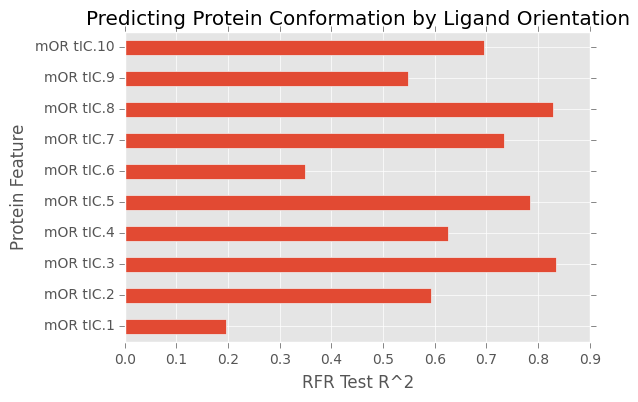

In [161]:
r2_scores_df = pd.Series(scores, index=y.columns)
title = "Predicting Protein Conformation by Ligand Orientation"
r2_scores_df.plot(kind='barh', title=title)
plt.xlabel("RFR Test R^2")
plt.ylabel("Protein Feature")
plt.show()
plt.savefig("%s/all_features_%s.pdf" %(analysis_dir, title))

In [51]:


#if not os.path.exists("%s/rfr_r2_scores.h5" %analysis_dir):
#pd.concat([pp_features_eq, bu72_features_eq, pp_tica_eq, bu72_tica_eq, bu72_pnas_eq], axis=1)
#y = pd.concat([pp_tica_eq, bu72_pnas_eq["tm6_tm3_packing", "rmsd_npxxy_active"]], axis=1)

y = features_eq[protein_top_features[0].columns.values.tolist() + sorted(feature_name_residues_dict.keys()) + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + [n for n in aromatic_names if "lig" not in n.lower()]]
rows = []
old_names = [str(f) for f in new_feature_names]
names = []
boundaries = [2., 2.5, 3., 3.5, 4., 4.5, 5.]
values = features_eq[[str(f) for f in new_feature_names]].values
new_values = []
for j in range(0,values.shape[1]):
    new_values.append(multi_onehot(values[:,j], boundaries))
    for i in range(0, len(boundaries)-1):
        if i == 0: names.append("%s < %f" %(old_names[j], boundaries[i]))
        names.append("%f < %s < %f" %(boundaries[i], old_names[j], boundaries[i+1]))
        if i == (len(boundaries)-2):
            names.append("%s > %f" %(old_names[j], boundaries[i+1]))
new_values = np.hstack(new_values)
x = pd.DataFrame(new_values, columns=names)
print(x.columns.values)
#x = sklearn.preprocessing.binarize(features_eq[[str(f) for f in new_feature_names]].values, 5.)
#x = np.hstack([x, features_eq[[n for n in aromatic_names if "lig" in n.lower()]].values])
#x = pd.DataFrame(x, columns = [str(f) for f in new_feature_names] + [n for n in aromatic_names if "lig" in n.lower()])
#x = features_eq[ligand_top_features[0].columns.values.tolist() + [n for n in aromatic_names if "lig" in n.lower()]]

y_classified = copy.deepcopy(y.values)
for j in range(0, y.values.shape[1]):
    try:
        minima = get_kde_mins(y.values[:,j])
        y_classified[:,j] = multi_binarizer(y.values[:,j], minima)
    except:
        continue
y_classified = pd.DataFrame(y_classified, columns = y.columns)



['Lig900-C6 to Gly325 < 2.000000'
 '2.000000 < Lig900-C6 to Gly325 < 2.500000'
 '2.500000 < Lig900-C6 to Gly325 < 3.000000' ...,
 '4.000000 < Lig900-C22 to Gln124 < 4.500000'
 '4.500000 < Lig900-C22 to Gln124 < 5.000000'
 'Lig900-C22 to Gln124 > 5.000000']


In [190]:
x['2.500000 < Lig900-N1 to Asp147 < 3.000000']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       1
43       1
44       1
45       1
46       1
47       1
48       1
49       1
50       1
51       1
52       1
53       0
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
90       1

In [52]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

we are operating on biox3


In [ ]:
if not os.path.exists("%s/all_features_multionehot_rfc_scores.h5" %analysis_dir):
    scores, importances = compute_rf_matrix(x.values, y_classified.values, n_trees=500, max_depth=3, n_folds=10, task="classification")
    verbosedump(scores, "%s/all_features_multionehot_classified_rfc_scores.h5" %analysis_dir)
    verbosedump(importances, "%s/all_features_multionehot_classified_rfc_importances.h5" %analysis_dir)
else:
    scores = verboseload("%s/all_features_multionehot_classified_rfc_scores.h5" %analysis_dir)
    importances = verboseload("%s/all_features_multionehot_classified_rfc_importances.h5" %analysis_dir)

#if not os.path.exists("%s/all_features_rfr_r2_scores.h5" %analysis_dir):
#    print("hi")
#r2_scores, importances = compute_rf_matrix(x.values, y.values, n_trees=500, n_folds=10)
#verbosedump(r2_scores, "%s/all_features_rfr_r2_scores.h5" %analysis_dir)
#verbosedump(importances, "%s/all_features_rfr_importances.h5" %analysis_dir)
#else:
#r2_scores = verboseload("%s/all_features_rfr_r2_scores.h5" %analysis_dir)
#importances = verboseload("%s/all_features_rfr_importances.h5" %analysis_dir)

In [54]:
list(set(x['LIG-N4 to HIS297-ND1: Cation-Pi'].values.tolist()))

KeyError: 'LIG-N4 to HIS297-ND1: Cation-Pi'

In [112]:
y["PHE289 to ASN150"].loc[x['LIG-C22 to TYR326-CG: Pi Parallel']==10].shape

(7548,)

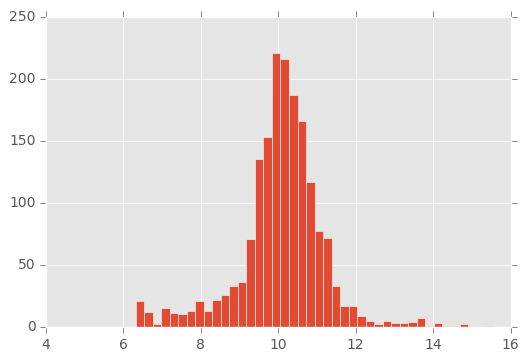

In [113]:
plt.clf()
plt.hist(y["PHE289 to ASN150"].loc[x['LIG-C22 to TYR326-CG: Pi Parallel']==10], bins=50,range=[5,16])
plt.show()

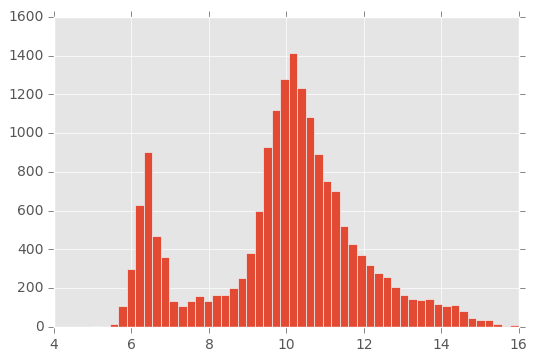

In [114]:
plt.clf()
plt.hist(y["PHE289 to ASN150"].loc[x['LIG-C22 to TYR326-CG: Pi Parallel']==0].values, bins=50, range=[5,16])
plt.show()

In [ ]:
print(importances.shape)
print(y.shape)
print(x.shape)

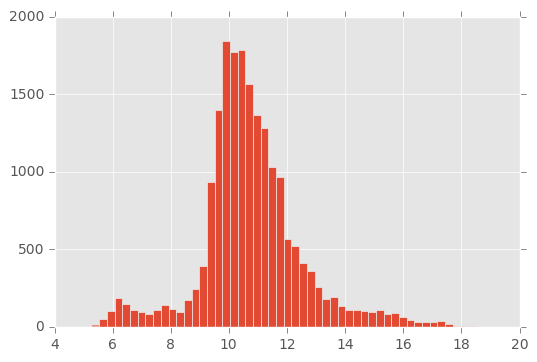

In [55]:
plt.hist(features_eq["PHE289 to ASN150"], bins=50)
plt.show()

In [59]:
scores_df = pd.Series(scores, index=y.columns)
scores_df.sort(inplace=False)

NameError: name 'y' is not defined

In [ ]:
#pearson_matrix = compute_pearson_matrix(x.values, y.values)
#pearson_df = pd.DataFrame(pearson_matrix, columns=y.columns, index=x.columns)
pearson_df["tm6_tm3_packing"].abs().sort(inplace=False)

In [68]:
importances_df = pd.DataFrame(importances, columns=y.columns, index=x.columns)
#importances_df["mOR tIC.5"].loc[[n for n in importances_df.index.values.tolist()]].abs().sort(inplace=False, ascending=False)
#importances_df["PHE289 to ASN150"].abs().sort(inplace=False, ascending=False).iloc[:100]
df = importances_df["TYR336 to ASP114"].abs().sort(inplace=False, ascending=False)
df.loc[[n for n in df.index.values.tolist() if "<" in n]]

3.000000 < Lig900-O1 to Trp293 < 3.500000     2.393170e-02
3.000000 < Lig900-C7 to Gly325 < 3.500000     1.758331e-02
3.000000 < Lig900-C15 to Cys321 < 3.500000    1.589293e-02
3.500000 < Lig900-C6 to Gly325 < 4.000000     1.435907e-02
3.500000 < Lig900-C8 to Gly325 < 4.000000     1.247180e-02
3.500000 < Lig900-C10 to His297 < 4.000000    1.228321e-02
3.000000 < Lig900-O2 to Gln124 < 3.500000     9.054919e-03
4.000000 < Lig900-C6 to Met151 < 4.500000     8.182503e-03
3.500000 < Lig900-C1 to Tyr148 < 4.000000     7.332243e-03
3.500000 < Lig900-C26 to Trp133 < 4.000000    5.625696e-03
4.000000 < Lig900-C19 to Thr120 < 4.500000    5.296940e-03
3.500000 < Lig900-O1 to Trp293 < 4.000000     5.150558e-03
4.000000 < Lig900-O2 to Cys321 < 4.500000     4.789867e-03
4.000000 < Lig900-C9 to Trp293 < 4.500000     4.647010e-03
3.500000 < Lig900-C7 to Met151 < 4.000000     4.484774e-03
4.500000 < Lig900-C10 to His297 < 5.000000    3.829581e-03
4.500000 < Lig900-C24 to Trp318 < 5.000000    3.701734e-

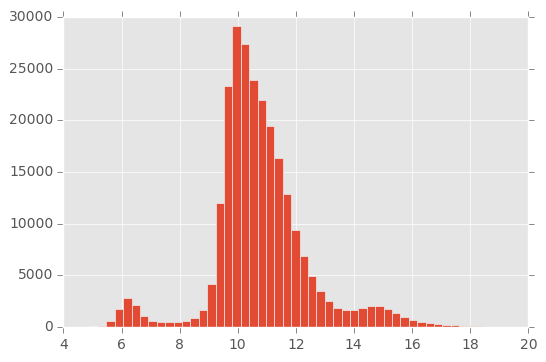

In [222]:
plt.clf()
plt.hist(pd.concat(all_traj_features,axis=0)["PHE289 to ASN150"].values, bins=50)
plt.show()

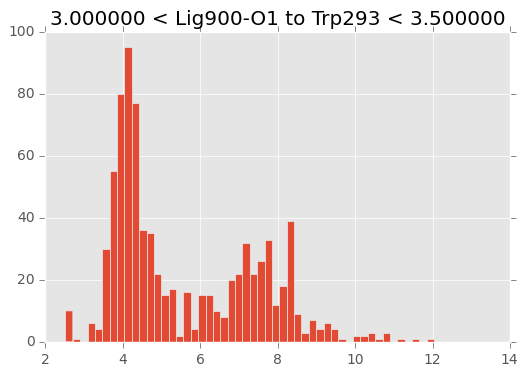

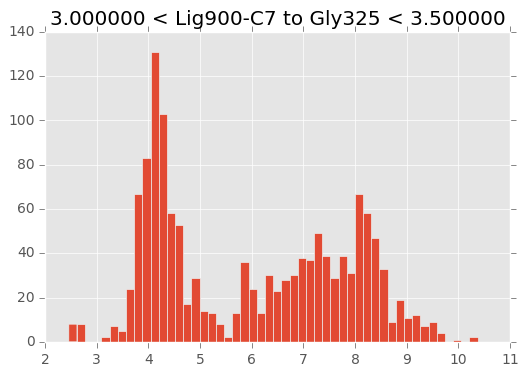

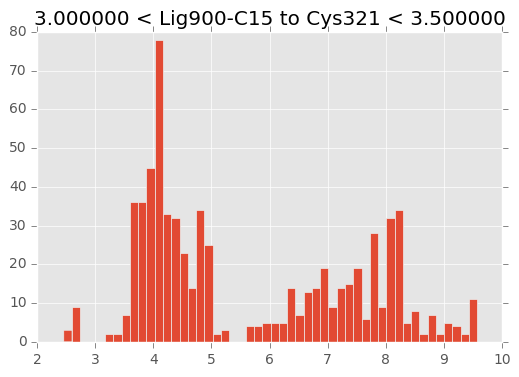

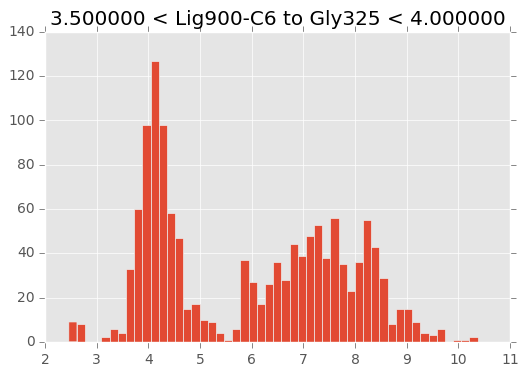

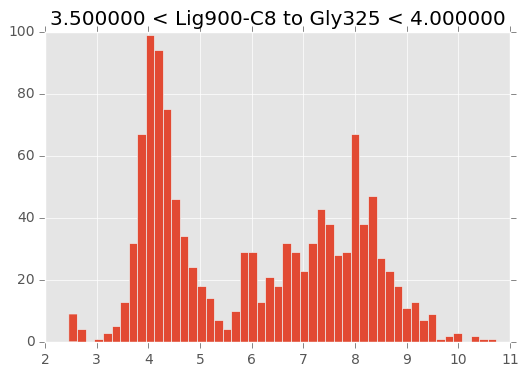

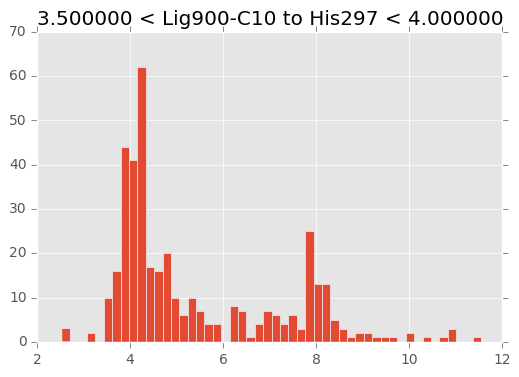

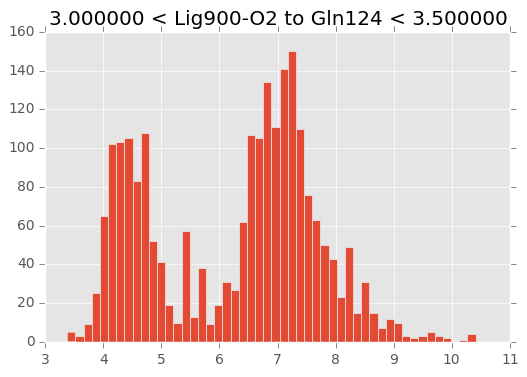

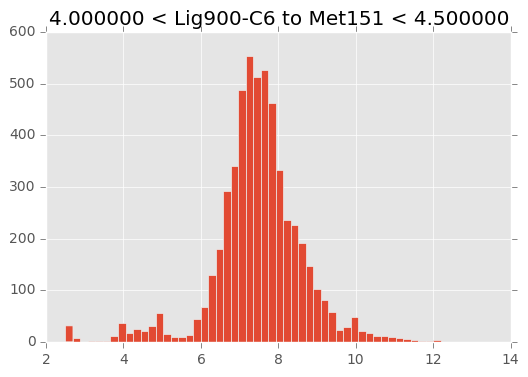

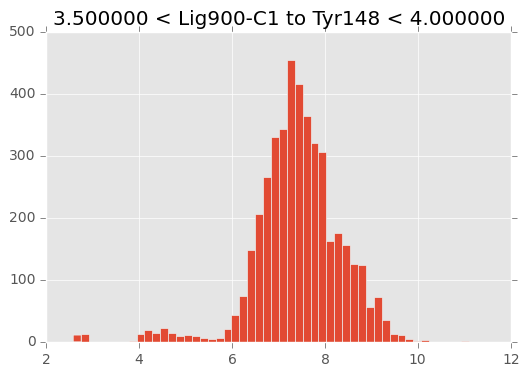

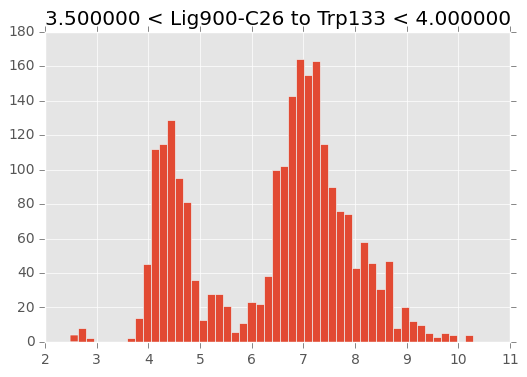

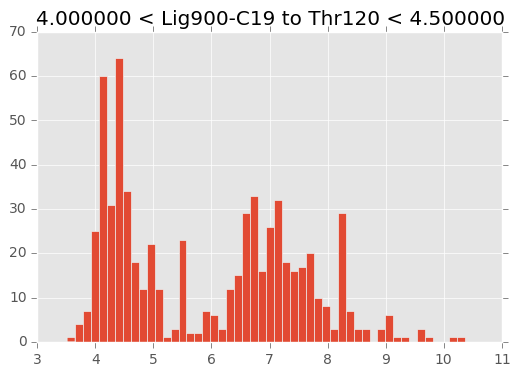

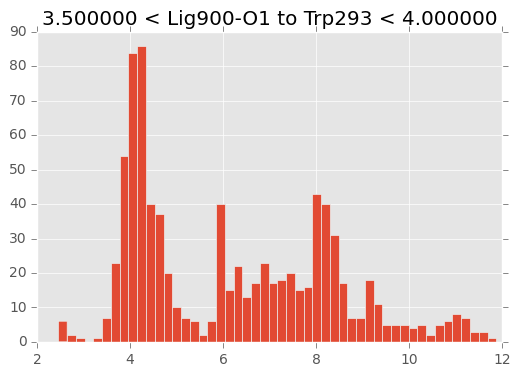

In [69]:
plt.clf()
for i in range(0,50):
    if "<" in df.index.values[i]:
        data =y.loc[x[df.index.values[i]] == 1.]["TYR336 to ASP114"].values
        #if len(np.where(data > 10.)[0]) < 5*len(np.where(data < 10.)[0]): continue
        #if len(np.where(data > 10.)[0]) < 150: continue
        plt.hist(data,bins=50)
        plt.title(df.index.values[i])
        plt.show()
        

KeyError: 'Lig900-C17 to Tyr326'

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


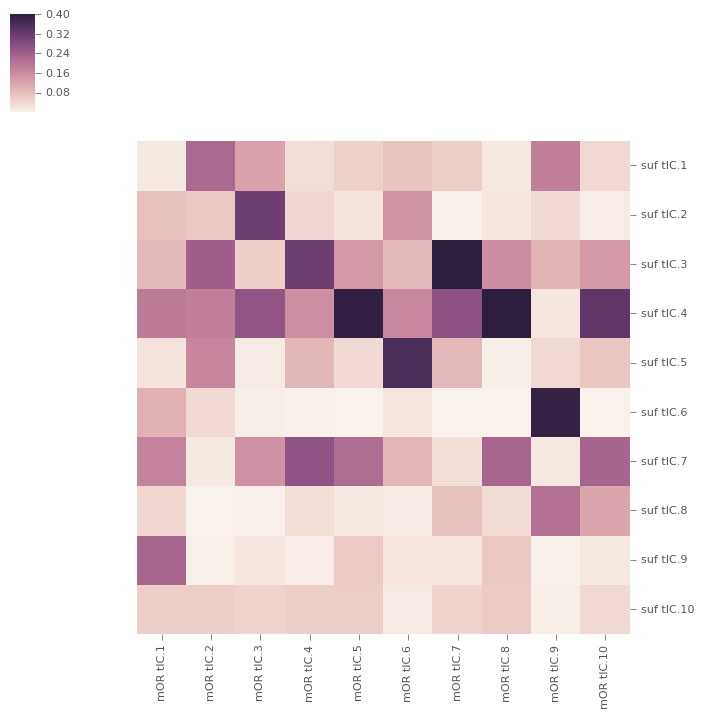

'\n\nplot_clustermap(importances_df, save_file="%s/feature_importances.pdf" %(save_dir, experiment_name), method=\'average\', z_score=None)\n\n\n\nfig = plt.figure()\nax = fig.add_subplot(111)\nheatmap = ax.pcolor(np.abs(pearson_matrix), cmap=plt.cm.Blues)\n\n# put the major ticks at the middle of each cell\nax.set_xticks(np.arange(pearson_matrix.shape[0])+0.5, minor=False)\nax.set_yticks(np.arange(pearson_matrix.shape[1])+0.5, minor=False)\n\n# want a more natural, table-like display\n#ax.invert_yaxis()\n#ax.xaxis.tick_top()\n\nax.set_xticklabels(row_labels, minor=False, rotation=270)\nax.set_yticklabels(column_labels, minor=False)\nfig.subplots_adjust(bottom=0.2)\n\nfig.savefig("%s/suf_vs_pp_pearson_heatmap.svg" % analysis_dir, format=\'svg\', dpi=1200)\nplot_file = "%s/suf_vs_pp_pearson_heatmap.pdf" % analysis_dir\npp = PdfPages(plot_file)\n\npp.savefig(fig)\n\npp.close()  \nplt.show()\n'

In [310]:
#import matplotlib
#matplotlib.style.use('ggplot')
#from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from plots import *
sc = StandardScaler()

#importances_scaled = pearson_matrix.T
#importances_scaled = sc.fit_transform(importances)
importances_scaled = copy.deepcopy(importances)
#for j in range(0, importances_scaled.shape[1]):
#    importances_scaled[:,j] *= r2_scores[j]

#responses_to_keep = np.where(np.array(r2_scores) > 0.5)[0]
#importances_scaled = importances_scaled[:,responses_to_keep]
#predictors_to_keep = list(set(np.where(importances_scaled > 0.03)[0].tolist()))
#print(responses_to_keep)
#print(predictors_to_keep)
#importances_scaled = importances_scaled[predictors_to_keep,:]
#print(len(responses_to_keep))

row_labels = ["bu72 tIC.%d" %i for i in range(1, n_components+1)]
column_labels = ["mOR tIC.%d" %i for i in range(1, pp_n_components+1)]
#row_labels = x.columns.values[predictors_to_keep]
#column_labels = y.columns.values[responses_to_keep]

importance_df = pd.DataFrame(importances_scaled, columns=column_labels, index=row_labels)

plot_clustermap(importance_df, save_file="%s/all_features_rfr_feature_importances.pdf" %(analysis_dir), method='average', row_cluster=False, col_cluster=False, z_score=None, xtick_labelsize=8, ytick_labelsize=8)
plt.show()

"""

plot_clustermap(importances_df, save_file="%s/feature_importances.pdf" %(save_dir, experiment_name), method='average', z_score=None)



fig = plt.figure()
ax = fig.add_subplot(111)
heatmap = ax.pcolor(np.abs(pearson_matrix), cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(pearson_matrix.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(pearson_matrix.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False, rotation=270)
ax.set_yticklabels(column_labels, minor=False)
fig.subplots_adjust(bottom=0.2)

fig.savefig("%s/bu72_vs_pp_pearson_heatmap.svg" % analysis_dir, format='svg', dpi=1200)
plot_file = "%s/bu72_vs_pp_pearson_heatmap.pdf" % analysis_dir
pp = PdfPages(plot_file)

pp.savefig(fig)

pp.close()  
plt.show()
"""

In [311]:
from jointplot_d3 import *
titles_j = [f for f in features_eq.columns.values if "Lig" in f and "Tyr326" in f]
print(titles_j)
jointplots(features_eq[titles_j].values, analysis_dir, titles=titles_j,
                           main = "mOR MSM", refcoords=None, refcoords_j=None, axes=None,
                               data_j=features_eq[["tm6_tm3_packing"]].values, titles_j=["tm6_tm3_packing"], reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                    

['Lig1-C13 to Tyr326', 'Lig1-C17 to Tyr326', 'Lig1-C18 to Tyr326', 'Lig1-C19 to Tyr326', 'Lig1-C22 to Tyr326', 'Lig1-C23 to Tyr326', 'Lig1-C24 to Tyr326', 'Lig1-C25 to Tyr326', 'Lig1-C26 to Tyr326', 'Lig1-C27 to Tyr326', 'Lig1-S1 to Tyr326', 'Lig1-O2 to Tyr326', 'Lig1-O3 to Tyr326', 'Lig1-N4 to Tyr326', 'Lig1-N5 to Tyr326', 'Lig1-C6 to Tyr326', 'Lig1-C7 to Tyr326', 'Lig1-C8 to Tyr326', 'Lig1-C9 to Tyr326', 'Lig1-C10 to Tyr326', 'Lig1-C11 to Tyr326', 'Lig1-C12 to Tyr326', 'Lig1-C14 to Tyr326', 'Lig1-C15 to Tyr326', 'Lig1-C16 to Tyr326', 'Lig1-C20 to Tyr326', 'Lig1-C21 to Tyr326']
Making delta G plots.
Traceback (most recent call last):
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
0
0
0
0
0
0
i=0
i=2
i=4
i=8
i=6
i=10
j=0
j=0
j=0
j=0
j=0
j=0
(19980, 27)
(19980, 27)
(19980, 27)
(19980, 27)
(19980, 27)
(19980, 27)
(19980, 1)
(19980, 1)
(19980, 1

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comp

  File "/home/enf/software/anaconda/lib/python2.7/inspect.py", line 1013, in getframeinfo
    lines, lnum = findsource(frame)
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 160, in findsource
    file = getsourcefile(object) or getfile(object)
  File "/home/enf/software/anaconda/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/home/enf/software/anaconda/lib/python2.7/inspect.py", line 490, in getmodule
    for modname, module in sys.modules.items():
KeyboardInterrupt



Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

r2_scores

In [64]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots(importances, plmf, top_features_per_tIC_i, top_features_per_tIC_j, n_combs=3, r2s = None, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=2, ref_df=None, save_dir=None):
    corr_matrix = importances.T
    ori_shape = np.shape(corr_matrix)
    
    if r2s is None:
        r2s = np.max(importances, axis=0)
    
    bu72_order = np.argsort(-1.0*r2s)
    all_features = []
    if features is None:
        for k, prot_idx in enumerate(bu72_order):
            if k == n_tICs:
                break
            lig_order = np.argsort(-1.0*importances[:,prot_idx])
            #if prot_idx != 9: continue
            print(lig_order)
            for l, lig_idx in enumerate(lig_order):
                if l == n_lig_tICs:
                    break
            
                features = []

                print("mOR tIC.%d" %(k+1))
                prot_features = ["mOR tIC.%d" %(prot_idx+1)]
                if custom_features is not None:
                    prot_features += custom_features[0]
                lig_features = ["bu72 tIC.%d" %(lig_idx+1)]
                all_prot_features = [str(f) for f in top_features_per_tIC_i[prot_idx]]
                all_lig_features = [str(f) for f in top_features_per_tIC_j[lig_idx]]
                pearson_matrix = compute_pearson_matrix(plmf[all_prot_features].values, plmf[all_lig_features].values)
                pearson_shape = pearson_matrix.shape
                inds = np.dstack(np.unravel_index(np.argsort(-1.0*np.abs(pearson_matrix).ravel()), pearson_shape))[0]
                prot_inds = []
                lig_inds = []

                for j, ind in enumerate([idx[0] for idx in inds]):
                    if len(prot_inds) == max_features: break
                    if ind in prot_inds: continue
                    prot_features.append(str(top_features_per_tIC_i[prot_idx][ind]))
                    prot_inds.append(ind)

                if custom_features is not None:
                    features += custom_features[0]

                for j, ind in enumerate([idx[1] for idx in inds]):
                    if len(lig_inds) == max_features: break
                    if ind in lig_inds: continue
                    lig_features.append(str(top_features_per_tIC_j[lig_idx][ind]))
                    lig_inds.append(ind)

                if make_jointplots:
                    print("Creating joint deltaG plots.")
                    data_i = features_eq[prot_features+all_prot_features].values
                    print(data_i.shape)
                    data_j = features_eq[lig_features+all_lig_features].values
                    print(data_j.shape)
                    tic_save_dir = "%s/mOR_tIC%d_vs_bu72_tIC%d" %(save_dir, prot_idx+1, lig_idx+1)
                    if not os.path.exists(tic_save_dir):
                        os.makedirs(tic_save_dir)
                    #else:
                    #    continue
                    
                    
                    if ref_df is not None:
                        refcoords = ref_df[prot_features+all_prot_features].values
                        print(refcoords.shape)
                        refcoords_j = ref_df[lig_features+all_lig_features].values
                        print(refcoords_j.shape)
                    else:
                        refcoords = None
                        refcoords_j = None

                    jointplots(data_i, tic_save_dir, titles=prot_features+all_prot_features,
                           main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                               data_j=data_j, titles_j=lig_features+all_lig_features, reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                    
                    jointplots(data_i, tic_save_dir, titles=prot_features+all_prot_features,
                               main = "mOR MSM", refcoords=refcoords, axes=None,
                               data_j=None, titles_j=None, reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                    
                    jointplots(data_j, tic_save_dir, titles=lig_features+all_lig_features,
                           main = "mOR MSM", refcoords=refcoords_j, refcoords_j=refcoords, axes=None,
                               data_j=data_i, titles_j=prot_features+all_prot_features, reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)

                features += (prot_features + lig_features)
    
                #plot_df_rolling(plmf[features].iloc[::subsample], "%s/key_measurements_tIC%d.pdf" %(save_dir, prot_idx+1), True, smoothing=smoothing, include_original=False, subplots=True, min_periods=None)
                #plt.show()  
                all_features.append(features)
    #features = ["tm6_tm3_packing", "rmsd_npxxy_active"]
    #features = ["mOR tIC.1", "mOR tIC.4", "mOR tIC.5"]
    #inds = np.dstack(np.unravel_index(np.argsort(-1.0*np.abs(corr_matrix).ravel()), ori_shape))[0]
    return all_features

jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

all_features= make_msm_features_plots(importances, protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      r2s = np.array(r2_scores), subsample=1, smoothing=100,
                                      n_tICs=5, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=features_eq, ref_df=None, save_dir=jointplots_dir)
#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "bu72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

[1 3 6 0 2 9 8 4 5 7]
mOR tIC.1
Creating joint deltaG plots.
(19980, 13)
(19980, 7)
Making delta G plots.
Done plotting columns
Making delta G plots.
0
0
0
0
0
0
i=0
i=1
i=2
i=3
i=4
i=5
j=0
j=0
j=0
j=0
j=0
j=0
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDEComputed 2D KDEComputed 2D KDEComputed 2D KDEComputed 2D KDEComputed 2D KDE





min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0





Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





111111





i=0
i=1
i=2
i=3
i=4
i=5
j=1
j=1
j=1
j=1
j=1
j=1
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(199

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(19980, 7)
(19980, 7)
4
4
4
4
4
4
i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





555555





i=0
i=1
i=2
i=3
i=4
i=5
j=5
j=5
j=5
j=5
j=5
j=5
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(19980, 7)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(0.0, 5.0)
(2, 19980)
(2, 19980)
9


(2, 19980)
Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)
9Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE

Computed Density. Now plotting.

Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)

(0.0, 5.0)(0.0, 5.0)

Computed 2D KDE
(0.0, 5.0)

(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.
78


12

1011(0.0, 5.0)
(2, 19980)
9



(2, 19980)
Computed 2D KDE
(2, 19980)
(2, 19980)
(2, 19980)
10Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed 2D KDE

Computed Density. Now plotting.
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)

(0.0, 5.0)


Computed 2D KDE
(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.
8



8
101112(0.0, 5.0)
9




(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
11Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Compu

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(19980, 13)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(19980, 13)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)
Computed Density. Now plotting.Computed 2D KDE



Computed 2D KDE

Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.(0.0, 5.0)





(0.0, 5.0)444(0.0, 5.0)4





4i=0
i=1
i=2
4i=4

j=4
j=4
j=4

j=4
i=5
(19980, 7)
(19980, 7)
(19980, 7)
i=3
(19980, 7)
j=4
(19980, 13)
(19980, 13)
(19980, 13)
j=4
(19980, 13)
(19980, 7)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 7)
(2, 19980)
(19980, 13)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(19980, 13)
Computed 2D KDE
(2, 19980)Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)
Computed Density. Now plotting.



Computed 2D KDE

Computed 2D KDE
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.(0.0, 5.0)Computed Density. Now plotting

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





444444





i=4
i=5
i=0
i=1
i=2
i=3
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

i=6
i=7


Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.11
i=9
i=10
j=11
j=11
(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.
Computed Density. Now plotting.

i=11
j=11
j=11
(19980, 13)
(19980, 13)



(0.0, 5.0)
(0.0, 5.0)i=8
j=11
(19980, 13)
(19980, 13)
(19980, 14)
(19980, 14)
45(0.0, 5.0)
(0.0, 5.0)
j=11
(19980, 13)
(19980, 14)
(19980, 14)
(2, 19980)
(2, 19980)



8
9(19980, 13)
(19980, 14)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
(2, 19980)
6
7
10
(19980, 14)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
(2, 19980)

(2, 19980)

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.

Computed Density. Now plotting.Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.

(0.0, 5.0)(0.0, 5.0)
Computed Density. Now plotting.Computed 2D KDE
Com

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(19980, 13)
(19980, 13)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed 2D KDE



Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)444





444i=0
i=1
i=2



j=4
j=4
j=4
i=3
i=4
i=5
(19980, 14)
(19980, 14)
(19980, 14)
j=4
j=4
j=4
(19980, 13)
(19980, 13)
(19980, 13)
(19980, 14)
(19980, 14)
(19980, 14)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 13)
(19980, 13)
(19980, 13)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed 2D KDE



Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se









i=10
j=11
j=11

i=9
i=8
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)j=11
(19980, 14)
(19980, 14)
i=6
j=11
j=11






(19980, 14)
(19980, 13)
(19980, 13)
j=11
(19980, 14)
(19980, 14)
222222(19980, 13)
(2, 19980)
(2, 19980)
(19980, 14)
(19980, 13)
(19980, 13)






(2, 19980)
Computed 2D KDE
Computed 2D KDE
(19980, 13)
(2, 19980)
(2, 19980)
i=0
i=1
i=2
i=3
i=4
i=5
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)
Computed 2D KDE
Computed 2D KDE
j=2
j=2
j=2
j=2
j=2
j=2
Computed Density. Now plotting.

Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)

(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.

(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(0.0, 5.0)


(0.0, 5.0)(0.0, 5.0)3
3
3
3
3
3

1212(0.0, 5.0)

i=0
i=1
i=2
i=3
i=4
i=5
12


1212j=3
j=3
j=3
j=3
j=3
j=3

i=7
i=11
12

(19980, 10)
(19980, 10)


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(19980, 14)
Computed Density. Now plotting.(19980, 14)

(19980, 14)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
(2, 19980)

(2, 19980)
(2, 19980)
(2, 19980)



Computed Density. Now plotting.Computed 2D KDE
(0.0, 5.0)Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
Computed Density. Now plotting.
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.


(0.0, 5.0)
8


567
(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)


9
(2, 19980)



(2, 19980)
(2, 19980)
8
(2, 19980)
Computed 2D KDE

9Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
min_density=0.0(2, 19980)

Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.
Computed 2D KDE
(2, 19980)



Computed Density. Now plotting.
Computed Density. Now plotting.Computed 2D KDE
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
Computed Density. Now plotting.



(0.0, 5.0)
769

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)







/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





333333





i=0
i=1
i=2
i=3
i=5
i=4
j=3
j=3
j=3
j=3
j=3
j=3
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





444444





i=0
i=1
i=2
i=3
i=5
i=4
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 1

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se



Computed 2D KDE
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE

Computed Density. Now plotting.Computed Density. Now plotting.min_density=0.0Computed Density. Now plotting.(0.0, 5.0)




(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.
(0.0, 5.0)7

(0.0, 5.0)

9
8

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.

(0.0, 5.0)(0.0, 5.0)

9
(2, 19980)
Computed 2D KDE
Computed Density. Now plotting.
(0.0, 5.0)
Done plotting columns
[3 6 2 8 9 7 1 0 4 5]
mOR tIC.3
Creating joint deltaG plots.
(19980, 11)
(19980, 14)
Making delta G plots.
0
0
0
0
0
0
i=0
i=1
i=2
i=3
i=4
i=5
j=0
j=0
j=0
j=0
j=0
j=0
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)







/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(19980, 14)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE



Computed Density. Now plotting.
Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)



(0.0, 5.0)
(0.0, 5.0)444
4



4
4i=0
i=1
i=2

i=4

j=4
j=4
j=4
i=3
j=4
i=5
(19980, 11)
(19980, 11)
(19980, 11)
j=4
(19980, 11)
j=4
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 11)
(19980, 14)
(19980, 11)
5
5
5
(19980, 14)
5
(19980, 14)
i=0
i=1
i=2
5
i=4
5
j=5
j=5
j=5
i=3
j=5
i=5
(19980, 11)
(19980, 11)
(19980, 11)
j=5
(19980, 11)
j=5
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 11)
(19980, 14)
(19980, 11)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 14)
(2, 19980)
(19980, 14)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.C

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)

Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE



Computed Density. Now plotting.
min_density=0.0(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)



(0.0, 5.0)
Computed Density. Now plotting.
789
8(0.0, 5.0)


10

(2, 19980)
(2, 19980)
(2, 19980)

(2, 19980)
8Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
9
Computed 2D KDE

Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)
min_density=0.0(2, 19980)



Computed 2D KDE

Computed 2D KDE
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)min_density=0.0Computed Density. Now plotting.
Computed Density. Now plotting.



(0.0, 5.0)
8910Computed Density. Now plotting.

(0.0, 5.0)


(0.0, 5.0)9
(2, 19980)
(2, 19980)
10


9Computed 2D KDE
Computed 2D KDE
(2, 19980)
10(2, 19980)

Computed Density. Now plotting.Comput

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(19980, 11)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE



Computed Density. Now plotting.
Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)



(0.0, 5.0)
(0.0, 5.0)444
4



4
4i=0
i=1
i=2

i=4

j=4
j=4
j=4
i=3
j=4
i=5
(19980, 14)
(19980, 14)
(19980, 14)
j=4
(19980, 14)
j=4
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 14)
(19980, 11)
(19980, 14)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 11)
(2, 19980)
(19980, 11)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE



Computed Density. Now plotting.
Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)





/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

i=13
Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(19980, 14)
j=3


Computed Density. Now plotting.


(19980, 11)
(19980, 14)
(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(2, 19980)
(19980, 11)


(0.0, 5.0)


Computed 2D KDE
(2, 19980)
33
333Computed Density. Now plotting.Computed 2D KDE


3



Computed Density. Now plotting.i=0
i=1

i=3
i=4
i=5
(0.0, 5.0)
j=3
j=3
i=2
j=3
j=3
j=3

(0.0, 5.0)(19980, 11)
(19980, 11)
j=3
(19980, 11)
(19980, 11)
(19980, 11)
4
(19980, 10)
(19980, 10)
(19980, 11)
(19980, 10)
(19980, 10)
(19980, 10)

44
4
(19980, 10)
4
4
4
i=12

i=0
i=1
4
i=3
i=4
i=5
j=4
i=13
j=4
j=4
i=2
j=4
j=4
j=4
(19980, 14)
j=4
(19980, 11)
(19980, 11)
j=4
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 14)
(19980, 10)
(19980, 10)
(19980, 11)
(19980, 10)
(19980, 10)
(19980, 10)
(2, 19980)
(19980, 11)
(2, 19980)
(2, 19980)
(19980, 10)
(2, 19980)
(2, 199

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.min_density=0.0





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.





(0.0, 5.0)789108





8(2, 19980)
(2, 19980)
(2, 19980)
9
(2, 19980)

Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
min_density=0.0Computed 2D KDE



min_density=0.0
Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
Computed Density. Now plotting.




Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)8910(0.0, 5.0)





99(2, 19980)
(2, 19980)
10
10

Computed 2D KDE
Computed 2D KDE
(2, 19980)

(2, 19980)
(2, 19980)
Computed Density. Now plotting.Comput

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se




7i=0
i=1
i=2
i=3
i=4

j=7
j=7
j=7
j=7
j=7
i=5
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
j=7
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 11)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE





Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





(0.0, 5.0)88888





8i=0
i=1
i=2
i=3
i=4

j=8
j=8
j=8
j=8
j=8
i=5
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
j=8
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 11)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)Computed Density. Now plotting.Com

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.


Computed Density. Now plotting.

(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)


(0.0, 5.0)

444
44


4

i=0
i=1
i=2

i=4
i=5
j=4
j=4
j=4
i=3
j=4
j=4
(19980, 12)
(19980, 12)
(19980, 12)
j=4
(19980, 12)
(19980, 12)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 12)
(19980, 14)
(19980, 14)
5
5
5
(19980, 14)
5
5
i=0
i=1
i=2
5
i=4
i=5
j=5
j=5
j=5
i=3
j=5
j=5
(19980, 12)
(19980, 12)
(19980, 12)
j=5
(19980, 12)
(19980, 12)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 12)
(19980, 14)
(19980, 14)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 14)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotti

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

Computed 2D KDE
8Computed Density. Now plotting.Computed 2D KDE



Computed Density. Now plotting.

Computed Density. Now plotting.(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(2, 19980)
(0.0, 5.0)



(0.0, 5.0)Computed 2D KDE

(0.0, 5.0)678
Computed Density. Now plotting.11



10

(2, 19980)
(2, 19980)
9

(0.0, 5.0)(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)

Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
9


Computed Density. Now plotting.Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)

(2, 19980)



(0.0, 5.0)(0.0, 5.0)Computed 2D KDE
878

Computed Density. Now plotting.


1011
(2, 19980)
(2, 19980)
9


(0.0, 5.0)Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)
(2, 19980)

min_density=0.0Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
10

Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.
Co

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(19980, 12)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.



Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)



(0.0, 5.0)
4444
4



4
i=0
i=1
i=2
i=3

i=5
j=4
j=4
j=4
j=4
i=4
j=4
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
j=4
(19980, 14)
(19980, 12)
(19980, 12)
(19980, 12)
(19980, 12)
(19980, 14)
(19980, 12)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 12)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.



Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)





/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se


j=0
(0.0, 5.0)j=0
(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)(19980, 14)

(19980, 14)


2

(19980, 12)
2(19980, 12)
22
22(2, 19980)

(2, 19980)


i=5


Computed 2D KDE
i=2
Computed 2D KDE
i=0
i=1
j=2
i=4
i=3
min_density=0.0j=2
min_density=0.0j=2
j=2
(19980, 12)
j=2
j=2

(19980, 12)

(19980, 12)
(19980, 12)
(19980, 10)
(19980, 12)
(19980, 12)
Computed Density. Now plotting.
(19980, 10)
Computed Density. Now plotting.
(19980, 10)
(19980, 10)
(2, 19980)
(19980, 10)
(19980, 10)
(0.0, 5.0)(2, 19980)
(0.0, 5.0)(2, 19980)
(2, 19980)
Computed 2D KDE
(2, 19980)
(2, 19980)

Computed 2D KDE

Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
1Computed Density. Now plotting.1Computed Density. Now plotting.Computed Density. Now plotting.
Computed Density. Now plotting.Computed Density. Now plotting.




(0.0, 5.0)

i=12
(0.0, 5.0)i=13
(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)j=1

j=1


3

(19980, 14)
3(19980, 14)
33
33(19980, 12)

(19980, 12)


i=5


(2, 1

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se







j=9
i=9
i=7
j=9
j=9
456789(19980, 12)
j=9
j=9
(19980, 12)
(19980, 12)






(19980, 10)
(19980, 12)
(19980, 12)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 10)
(19980, 10)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
7
Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)
Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.



Computed 2D KDE


Computed Density. Now plotting.Computed Density. Now plotting.

(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)min_density=0.0(0.0, 5.0)(0.0, 5.0)

(0.0, 5.0)(0.0, 5.0)






(0.0, 5.0)(0.0, 5.0)

5678Computed Density. Now plotting.
10






(0.0, 5.0)(2, 19980)

9
(2, 19980)


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 10)
(19980, 12)
(19980, 12)
(19980, 12)
(19980, 12)
(19980, 12)
(19980, 12)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)







/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se



i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 8)
(19980, 8)
(19980, 8)
(19980, 8)
(19980, 8)
(19980, 8)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





555555





i=0
i=1
i=2
i=3
i=4
i=5
j=5
j=5
j=5
j=5
j=5
j=5
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 8)
(19980, 8)
(19980, 8)
(19980, 8)
(19980, 8)
(19980, 8)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.C

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se


(2, 19980)
Computed 2D KDE
Computed 2D KDE
(2, 19980)
(2, 19980)
9Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE

min_density=0.0

Computed Density. Now plotting.Computed Density. Now plotting.(2, 19980)

(0.0, 5.0)(0.0, 5.0)

Computed 2D KDE
Computed Density. Now plotting.


(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.(0.0, 5.0)78





109(0.0, 5.0)9(2, 19980)
9




Computed 2D KDE
(2, 19980)
(2, 19980)
(2, 19980)
10(2, 19980)
Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed 2D KDE

Computed 2D KDE

Computed Density. Now plotting.Computed Density. Now plotting.min_density=0.0(2, 19980)
Computed Density. Now plotting.(0.0, 5.0)


Computed 2D KDE


(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.
Computed Density. Now plotting.(0.0, 5.0)8

(0.0, 5.0)


10
(0.0, 5.0)109


10
(2, 19980)
(2, 19980)
(2, 19980)

10Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)

Computed Density. Now p

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se


7

i=0
i=1
i=2

i=3
i=5
j=7
j=7
j=7
i=4
j=7
j=7
(19980, 8)
(19980, 8)
(19980, 8)
j=7
(19980, 8)
(19980, 8)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 8)
(19980, 11)
(19980, 11)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 11)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.


Computed Density. Now plotting.

(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)


(0.0, 5.0)

0
0

i=6
i=7
j=0
j=0
(19980, 8)
(19980, 8)
(19980, 11)
(19980, 11)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
min_density=0.0min_density=0.0

Computed Density. Now plotting.
Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)

11

i=6
i=7
j=1
j=1
(19980, 8)
(19980, 8)
(19980, 11)
(19980, 11)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

4
4
i=0
i=1
i=2
4
i=4
i=5
j=4
j=4
j=4
i=3
j=4
j=4
(19980, 11)
(19980, 11)
(19980, 11)
j=4
(19980, 11)
(19980, 11)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 11)
(19980, 14)
(19980, 14)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 14)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.


Computed Density. Now plotting.

(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)
(0.0, 5.0)(0.0, 5.0)


(0.0, 5.0)

555
55


5

i=0
i=1
i=2

i=4
i=5
j=5
j=5
j=5
i=3
j=5
j=5
(19980, 11)
(19980, 11)
(19980, 11)
j=5
(19980, 11)
(19980, 11)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 11)
(19980, 14)
(19980, 14)
(2, 19980)
(2, 19980)
(2, 19980)
(19980, 14)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.C

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(0.0, 5.0)(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)

Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
9min_density=0.0Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(2, 19980)
Computed Density. Now plotting.
(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)Computed 2D KDE
(0.0, 5.0)



Computed Density. Now plotting.
891010
10



(0.0, 5.0)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)

(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
10Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.min_density=0.0
Computed Density. Now plotting.



(2, 19980)

(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)Computed Density. Now plotting.
Computed 2D KDE
(0.0, 5.0)


(0.0, 5.0)Computed Density. Now plotting.
910



(0.0, 5.0)(2, 19980)
(2, 19980)

Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed 

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=4
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 14)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(19980, 11)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
(2, 19980)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)(0.0, 5.0)







In [ ]:
protein_ligand_msm_featurized.columns.values.tolist()

In [178]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots(importances, plmf, features_i, features_j, n_combs=3, r2s = None, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=100, ref_df=None, save_dir=None):
    corr_matrix = importances.T
    ori_shape = np.shape(corr_matrix)
    
    if r2s is None:
        r2s = np.max(importances, axis=0)
    
    bu72_order = np.argsort(-1.0*r2s)
    all_features = []
    if features is None:
        for k, prot_idx in enumerate(bu72_order):
            if k == n_tICs:
                break
            lig_order = np.argsort(-1.0*importances[:,prot_idx])
            
            if "PHE289 to ASN150" not in str(features_i[prot_idx]): continue
            
            all_prot_features = [str(features_i[prot_idx])]
            all_lig_features = [str(features_j[lig_idx]) for lig_idx in lig_order[:n_lig_tICs]]
            

            features = []
            prot_features = []
            lig_features = []

            if make_jointplots:
                print("Creating joint deltaG plots.")
                data_i = features_eq[prot_features+all_prot_features].values
                print(data_i.shape)
                data_j = features_eq[lig_features+all_lig_features].values
                print(data_j.shape)

                if ref_df is not None:
                    refcoords = ref_df[prot_features+all_prot_features].values
                    print(refcoords.shape)
                    refcoords_j = ref_df[lig_features+all_lig_features].values
                    print(refcoords_j.shape)
                    combined_refcoords = np.hstack([refcoords, refcoords_j])
                    custom_refcoords = ref_df[custom_features[0]].values
                else:
                    refcoords = None
                    refcoords_j = None
                    combined_refcoords = None
                    custom_refcoords = None

                jointplots(data_i, save_dir, titles=prot_features+all_prot_features,
                       main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                           data_j=data_j, titles_j=lig_features+all_lig_features, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8, custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                
                jointplots(data_j, save_dir, titles=lig_features + all_lig_features, 
                       main = "mOR MSM", refcoords=refcoords_j, refcoords_j=refcoords, axes=None,
                           data_j=data_i, titles_j=prot_features+all_prot_features, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8., custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                
                jointplots(np.hstack([data_i, data_j]), save_dir, titles=prot_features+all_prot_features+lig_features+all_lig_features,
                       main = "mOR MSM", refcoords=combined_refcoords, refcoords_j=custom_refcoords, axes=None,
                           data_j=features_eq[custom_features[0]].values, titles_j=custom_features[0], reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8., custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)

    #features = ["tm6_tm3_packing", "rmsd_npxxy_active"]
    #features = ["mOR tIC.1", "mOR tIC.4", "mOR tIC.5"]
    #inds = np.dstack(np.unravel_index(np.argsort(-1.0*np.abs(corr_matrix).ravel()), ori_shape))[0]
    return all_features

jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

all_features= make_msm_features_plots(importances, protein_ligand_msm_featurized,
                                      y.columns, x.columns, n_combs=5,
                                      r2s = np.array(scores), subsample=1, smoothing=100,
                                      n_tICs=20, max_features=1,
                                      #custom_features = None,
                                      custom_features=[[], [], []], 
                                      make_jointplots=True, features_eq=features_eq, ref_df=ref_features, save_dir=jointplots_refcoords_dir)
#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "bu72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

Creating joint deltaG plots.
(19953, 1)
(19953, 100)
(2, 1)


KeyError: "['Lig900-C17 to Tyr326' 'Lig900-C16 to Tyr326' 'Lig900-C1 to Tyr148'\n 'Lig900-C2 to Tyr148' 'Lig900-C5 to Gly325' 'Lig900-C18 to Tyr326'\n 'Lig900-C3 to Ala117' 'Lig900-O2 to Gln124' 'Lig900-C15 to Gln124'\n 'Lig900-C4 to Tyr326' 'Lig900-C21 to Thr120' 'Lig900-C14 to Gln124'\n 'Lig900-C17 to Ile296' 'Lig900-C8 to Trp293' 'Lig900-O1 to Ile296'\n 'Lig900-C7 to Gly325' 'Lig900-C5 to Tyr326' 'Lig900-C7 to Met151'\n 'Lig900-C5 to Trp293' 'Lig900-C6 to Gly325' 'Lig900-C19 to Thr120'\n 'Lig900-C6 to Met151' 'Lig900-C9 to Ile296' 'Lig900-C26 to Trp133'\n 'Lig900-O1 to Lys233' 'Lig900-C8 to Met151' 'Lig900-C27 to Trp133'\n 'Lig900-C9 to Val300' 'Lig900-C21 to Gln124' 'Lig900-C7 to Trp293'\n 'Lig900-C3 to Asn150' 'Lig900-C10 to Ile296' 'Lig900-O1 to Trp318'\n 'Lig900-C25 to Trp133' 'LIG-C6 to TRP293-CD2: Pi T' 'Lig900-C5 to Met151'\n 'Lig900-C17 to Gly325' 'Lig900-C10 to His297' 'Lig900-O1 to Ala240'\n 'Lig900-C25 to Trp318' 'Lig900-C19 to Tyr326' 'Lig900-C9 to Trp293'\n 'Lig900-C8 to Val300' 'Lig900-C10 to Tyr148' 'Lig900-C16 to Gln124'\n 'Lig900-O1 to Val300' 'Lig900-C10 to Val300' 'Lig900-C3 to Tyr326'\n 'Lig900-C24 to Gln124' 'Lig900-C15 to Ile322' 'Lig900-C25 to Gln124'\n 'Lig900-N1 to Tyr326' 'Lig900-C16 to Gly325' 'Lig900-C25 to Asn127'\n 'LIG-N1 to TYR148-CG: Cation-Pi' 'Lig900-C24 to Trp318'\n 'Lig900-N2 to Tyr148' 'Lig900-O1 to Trp293' 'Lig900-C4 to Gly325'\n 'Lig900-C13 to Tyr148' 'Lig900-C8 to Gly325' 'Lig900-C15 to Cys321'\n 'Lig900-C13 to Ile296' 'Lig900-C16 to Cys321' 'Lig900-C8 to Ile296'\n 'Lig900-O2 to Cys321' 'Lig900-C15 to Val300' 'Lig900-C16 to Trp318'\n 'Lig900-C17 to Ile322' 'LIG-C6 to HIS297-ND1: Pi T' 'Lig900-C12 to Tyr148'\n 'Lig900-C23 to Gln124' 'Lig900-C11 to Ile296' 'Lig900-C20 to Gln124'\n 'Lig900-C8 to His297' 'Lig900-C26 to Leu219' 'Lig900-C20 to Tyr326'\n 'Lig900-O2 to Ile322' 'Lig900-C9 to Met151' 'Lig900-C16 to Ile296'\n 'Lig900-C25 to Leu219' 'LIG-C23 to TRP318-CD2: Pi T' 'Lig900-C7 to His297'\n 'Lig900-C6 to Trp293' 'Lig900-O1 to Val236' 'LIG-C6 to TRP318-CD2: Pi T'\n 'Lig900-C22 to Tyr148' 'Lig900-O1 to Met151' 'Lig900-C16 to Val300'\n 'Lig900-C11 to Met151' 'Lig900-C28 to Ile144' 'Lig900-C7 to Ile296'\n 'Lig900-C28 to Gln124' 'Lig900-C8 to Val236' 'Lig900-C28 to Val143'\n 'Lig900-C5 to Ile296' 'Lig900-C3 to Met151' 'Lig900-C27 to Ile144'\n 'Lig900-C10 to Met151' 'Lig900-C21 to Ile322'] not in index"

In [114]:
jointplots_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/jointplots'

In [125]:
names

['TRP293-CD2 to PHE289-CG: Pi Parallel',
 'TRP293-CG to PHE289-CG: Pi Parallel',
 'SUF-C22 to TRP293-CG: Pi Parallel',
 'SUF-C22 to TRP293-CD2: Pi Parallel',
 'SUF-C22 to TRP318-CG: Pi Parallel',
 'SUF-C22 to TYR326-CG: Pi Parallel',
 'SUF-C22 to PHE289-CG: Pi Parallel',
 'SUF-C22 to HIS319-ND1: Pi Parallel',
 'SUF-C22 to TRP133-CG: Pi Parallel',
 'SUF-C22 to TRP133-CD2: Pi Parallel',
 'SUF-C22 to TYR148-CG: Pi Parallel',
 'SUF-C22 to TRP318-CD2: Pi Parallel',
 'SUF-C22 to TYR128-CG: Pi Parallel',
 'SUF-C22 to HIS297-ND1: Pi Parallel',
 'SUF-C19 to TRP293-CG: Pi Parallel',
 'SUF-C19 to TRP293-CD2: Pi Parallel',
 'SUF-C19 to TRP318-CG: Pi Parallel',
 'SUF-C19 to TYR326-CG: Pi Parallel',
 'SUF-C19 to PHE289-CG: Pi Parallel',
 'SUF-C19 to HIS319-ND1: Pi Parallel',
 'SUF-C19 to TRP133-CG: Pi Parallel',
 'SUF-C19 to TRP133-CD2: Pi Parallel',
 'SUF-C19 to TYR148-CG: Pi Parallel',
 'SUF-C19 to TRP318-CD2: Pi Parallel',
 'SUF-C19 to TYR128-CG: Pi Parallel',
 'SUF-C19 to HIS297-ND1: Pi Parallel

In [63]:
features_eq[ 'Lig1-C13 to Lys233']

0         8.016491
1        11.015210
2         9.609416
3         8.458838
4         8.766411
5         9.873851
6         8.628055
7         7.990847
8         8.784686
9         7.736464
10        9.021933
11       12.858829
12       10.202114
13        9.227235
14       11.622316
15        9.784960
16        9.161734
17        8.579679
18       10.121966
19       11.640297
20        8.450169
21       10.255774
22       11.394862
23       11.039532
24       10.960007
25       10.704762
26       10.759039
27       10.660649
28       12.006884
29       11.223108
           ...    
19950     8.109831
19951     7.513936
19952     7.493557
19953     8.096045
19954     6.178954
19955     8.466286
19956    10.991145
19957     8.885442
19958     8.579984
19959    10.923882
19960     9.229563
19961     6.049931
19962     8.287829
19963     9.229563
19964     7.285461
19965     6.965003
19966    13.561997
19967    11.947874
19968    11.805396
19969    12.598274
19970    10.795335
19971    13.

In [ ]:
tpt_paths_features

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots_single(importances, plmf, top_features_per_tIC_i, top_features_per_tIC_j, n_combs=3, r2s = None, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=1, ref_df=None, save_dir=None, prot_pairs=[],
                            tpt_paths=None):

    for t, prot_pair in enumerate(prot_pairs):
        if t == n_tICs:
            break
        #if prot_pair[1] != 4: continue
        tIC_i, tIC_j = prot_pair
        tic_save_dir = "%s/tIC%d_tIC%d" %(save_dir, tIC_i+1, tIC_j+1)
        if not os.path.exists(tic_save_dir):
            os.makedirs(tic_save_dir)
        #else:
        #    continue
        
        features_i = ["mOR tIC.%d" %(tIC_i+1)] + [str(f) for f in top_features_per_tIC_i[tIC_i]]
        if custom_features is not None:
            features_i += custom_features[0]
        features_j = ["mOR tIC.%d" %(tIC_j+1)] + [str(f) for f in top_features_per_tIC_i[tIC_j]]
        
        data_i = features_eq[features_i].values
        data_j = features_eq[features_j].values

        if ref_df is not None:
            refcoords = ref_df[features_i].values
            refcoords_j = ref_df[features_j].values
        else:
            refcoords = None
            refcoords_j = None
        
        if tpt_paths is not None:
            paths_i = [p[features_i].values for p in tpt_paths]
            paths_j = [p[features_j].values for p in tpt_paths]
        
            paths_to_display = [p[features_i] for p in tpt_paths]
        else:
            paths_i = None
            paths_j = None
        
        jointplots(data_i, tic_save_dir, titles=features_i,
                           main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                           data_j=data_j, titles_j=features_j, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=5., custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, tpt_paths=paths_i,
                           tpt_paths_j=paths_j)
                            
jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

jointplots_tpt_dir = "%s/jointplots_tpt_annotated" %analysis_dir
if not os.path.exists(jointplots_tpt_dir):
    os.makedirs(jointplots_tpt_dir)

tics_to_examine = [1, 3]
prot_pairs = []
for i in range(0, len(tics_to_examine)):
    for j in range(i+1, len(tics_to_examine)):
        prot_pairs.append((tics_to_examine[i], tics_to_examine[j]))
        prot_pairs.append((tics_to_examine[j], tics_to_examine[i]))
print(prot_pairs)
    
make_msm_features_plots_single(importances, protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      r2s = np.array(r2_scores), subsample=1, smoothing=100,
                                      n_tICs=10, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=apo_features_eq, ref_df=ref_features, save_dir=jointplots_refcoords_dir,
                                      prot_pairs=prot_pairs)
                                      #tpt_paths=None)
#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "bu72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

In [119]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots_single(plmf, top_features_per_tIC_i, top_features_per_tIC_j, n_combs=3, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=1, ref_df=None, save_dir=None, prot_pairs=[],
                            tpt_paths=None, alt_features_eq=None):

    for t, prot_pair in enumerate(prot_pairs):
        #if prot_pair[1] != 4: continue
        tIC_i, tIC_j = prot_pair
        tic_save_dir = "%s/tIC%d_tIC%d" %(save_dir, tIC_i+1, tIC_j+1)
        if not os.path.exists(tic_save_dir):
            os.makedirs(tic_save_dir)
        #else:
        #    continue
        
        features_i = ["mOR tIC.%d" %(tIC_i+1)] + [str(f) for f in top_features_per_tIC_i[tIC_i]]
        if custom_features is not None:
            features_i += custom_features[0]
        features_j = ["mOR tIC.%d" %(tIC_j+1)] + [str(f) for f in top_features_per_tIC_i[tIC_j]]
        
        data_i = features_eq[features_i].values
        data_j = features_eq[features_j].values

        if ref_df is not None:
            refcoords = ref_df[features_i].values
            refcoords_j = ref_df[features_j].values
        else:
            refcoords = None
            refcoords_j =  None
        
        if tpt_paths is not None:
            paths_i = [p[features_i].values for p in tpt_paths]
            paths_j = [p[features_j].values for p in tpt_paths]
        
            paths_to_display = [p[features_i] for p in tpt_paths]
        else:
            paths_i = None
            paths_j = None
        
        if alt_features_eq is not None:
            custom_lims = custom_lim_finder(np.vstack([features_eq[features_i].values, alt_features_eq[features_i].values]))
            custom_lims_j = custom_lim_finder(np.vstack([features_eq[features_j].values, alt_features_eq[features_j].values]))
        else:
            custom_lims = None
            custom_lims_j = None

        
        jointplots(data_i, tic_save_dir, titles=features_i,
                           main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                           data_j=data_j, titles_j=features_j, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8., custom_lims=custom_lims, custom_lims_j=custom_lims_j,
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, tpt_paths=paths_i,
                           tpt_paths_j=paths_j, remake=False)
                            
jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

apo_jointplots_refcoords_dir = "%s/apo_refcoords_jointplots_8pt0" %analysis_dir
if not os.path.exists(apo_jointplots_refcoords_dir):
    os.makedirs(apo_jointplots_refcoords_dir)

bu72_jointplots_refcoords_dir = "%s/bu72_refcoords_jointplots_8pt0" %analysis_dir
if not os.path.exists(bu72_jointplots_refcoords_dir):
    os.makedirs(bu72_jointplots_refcoords_dir)
    
apo_jointplots_dir = "%s/apo_refcoords_jointplots_8pt0" %analysis_dir
if not os.path.exists(apo_jointplots_refcoords_dir):
    os.makedirs(apo_jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

jointplots_tpt_dir = "%s/jointplots_tpt_annotated" %analysis_dir
if not os.path.exists(jointplots_tpt_dir):
    os.makedirs(jointplots_tpt_dir)

tics_to_examine = [1,3,4,7]
prot_pairs = []
for i in tics_to_examine:
    for j in tics_to_examine:
        if j != i:
            prot_pairs.append((i,j))
print(prot_pairs)

make_msm_features_plots_single(protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      subsample=1, smoothing=100,
                                      n_tICs=10, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=features_eq, ref_df=ref_features, save_dir=bu72_jointplots_refcoords_dir,
                                      prot_pairs=prot_pairs, tpt_paths=None, alt_features_eq=apo_features_eq)
                                      #tpt_paths=None)

make_msm_features_plots_single(protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      subsample=1, smoothing=100,
                                      n_tICs=10, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=apo_features_eq, ref_df=ref_features, save_dir=apo_jointplots_refcoords_dir,
                                      prot_pairs=prot_pairs, tpt_paths=None, alt_features_eq=features_eq)
                                      #tpt_paths=None)

#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "BU72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "BU72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

[(1, 3), (1, 4), (1, 7), (3, 1), (3, 4), (3, 7), (4, 1), (4, 3), (4, 7), (7, 1), (7, 3), (7, 4)]
Making delta G plots.
Done plotting columns
Making delta G plots.
0
0
0
0
0
i=0
i=1
i=2
i=3
i=4
j=0
j=0
j=0
j=0
j=0
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDEComputed 2D KDE
Computed 2D KDEmin_density=0.0

min_density=0.0

min_density=0.0min_density=0.0
min_density=0.0Computed Density. Now plotting.


Computed Density. Now plotting.

(0.0, 8.0)Computed Density. Now plotting.
Computed Density. Now plotting.
(0.0, 8.0)Computed Density. Now plotting.

(0.0, 8.0)(0.0, 8.0)
(0.0, 8.0)[[  9.15980816  -2.57717773]
 [ 13.01761985  -0.2671376 ]]

[[ 1.01704721 -2.57717773]
 [-0.58263835 -0.2671376 ]]

[[ 0.64148617 -2.57717773]
 [ 0.         -0.2671376 ]][[ 0.         -2.57717773]
 [ 0.64148796 -0.2671376 ]]
[[ 12.54730225  -2.577177

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

Computed 2D KDE

Computed Density. Now plotting.Computed Density. Now plotting.
Computed Density. Now plotting.(0.0, 8.0)

(0.0, 8.0)

(0.0, 8.0)(0.0, 8.0)
(0.0, 8.0)[[  9.15980816   9.28451443]
 [ 13.01761985   9.20263004]]

[[ 1.01704721  9.28451443]
 [-0.58263835  9.20263004]]

[[ 0.64148617  9.28451443]
 [ 0.          9.20263004]][[ 0.          9.28451443]
 [ 0.64148796  9.20263004]]
[[ 12.54730225   9.28451443]
 [  6.49738598   9.20263004]]4

4

44
4i=2


i=0

j=4
i=3
i=4
j=4
i=1
(19616, 5)
j=4
j=4
(19616, 5)
j=4
(19616, 7)
(19616, 5)
(19616, 5)
(19616, 7)
(19616, 5)
(2, 19616)
(19616, 7)
(19616, 7)
(2, 19616)
(19616, 7)
Computed 2D KDE
(2, 19616)
(2, 19616)
Computed 2D KDE
(2, 19616)
Computed Density. Now plotting.Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed 2D KDE

Computed Density. Now plotting.Computed Density. Now plotting.
Computed Density. Now plotting.(0.0, 8.0)

(0.0, 8.0)

(0.0, 8.0)(0.0, 8.0)
(0.0, 8.0)[[  9.15980816  10.90048313]
 [ 13.017619

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se





(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)




[[  1.01704721   8.39526081]
 [ -0.58263835  10.54314613]][[ 12.54730225   8.39526081]
 [  6.49738598  10.54314613]][[  9.15980816   8.39526081]
 [ 13.01761985  10.54314613]][[  0.64148617   8.39526081]
 [  0.          10.54314613]][[  0.           8.39526081]
 [  0.64148796  10.54314613]]




44444




i=0
i=1
i=2
i=3
i=4
j=4
j=4
j=4
j=4
j=4
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.




(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)




[[ 1.01704721  8.44507885]
 [-0.58263835  8.60399818]][[ 12.54730225   8.44507885]
 [  6.49738598   8.60399818]][[  9.15980816   8.44507

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se





(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)




[[ 1.01704721  4.93912506]
 [-0.58263835  4.77628613]][[ 12.54730225   4.93912506]
 [  6.49738598   4.77628613]][[  9.15980816   4.93912506]
 [ 13.01761985   4.77628613]][[ 0.64148617  4.93912506]
 [ 0.          4.77628613]][[ 0.          4.93912506]
 [ 0.64148796  4.77628613]]




44444




i=0
i=1
i=2
i=3
i=4
j=4
j=4
j=4
j=4
j=4
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 5)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.




(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)




[[  1.01704721  11.37884331]
 [ -0.58263835   8.582757  ]][[ 12.54730225  11.37884331]
 [  6.49738598   8.582757  ]][[  9.15980816  11.37884331]
 [ 

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.



(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)



[[  0.          12.54730225]
 [  0.64148796   6.49738598]][[  0.64148617  12.54730225]
 [  0.           6.49738598]][[  9.15980816  12.54730225]
 [ 13.01761985   6.49738598]][[ 11.37884331  12.54730225]
 [  8.582757     6.49738598]]



Done plotting columns
Making delta G plots.
0
0
0
0
0
0
i=0
i=1
i=2
i=3
i=4
i=5
j=0
j=0
j=0
j=0
j=0
j=0
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0





Comput

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

33





i=0
i=1
i=2
i=3
i=4
i=5
j=3
j=3
j=3
j=3
j=3
j=3
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)





[[ -2.57717773   8.39526081]
 [ -0.2671376   10.54314613]][[  3.83722496   8.39526081]
 [  3.35832787  10.54314613]][[  8.93306351   8.39526081]
 [  6.18403959  10.54314613]][[  9.28451443   8.39526081]
 [  9.20263004  10.54314613]][[ 10.90048313   8.39526081]
 [ 16.76941299  10.54314613]][[  6.95101023   8.39526081]
 [  6.25163794  10.54314613]]





444444





i=0
i=1
i=2
i=3
i=4


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

33





i=0
i=1
i=2
i=3
i=4
i=5
j=3
j=3
j=3
j=3
j=3
j=3
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)





[[-2.57717773  4.93912506]
 [-0.2671376   4.77628613]][[ 3.83722496  4.93912506]
 [ 3.35832787  4.77628613]][[ 8.93306351  4.93912506]
 [ 6.18403959  4.77628613]][[ 9.28451443  4.93912506]
 [ 9.20263004  4.77628613]][[ 10.90048313   4.93912506]
 [ 16.76941299   4.77628613]][[ 6.95101023  4.93912506]
 [ 6.25163794  4.77628613]]





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

Done plotting columns
Making delta G plots.
0
0
0
0
0
0
i=0
i=1
i=2
i=3
i=4
i=5
j=0
j=0
j=0
j=0
j=0
j=0
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0





Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
Computed Density. Now plotting.
(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)





[[ 0.17776327 -2.57717773]
 [-0.07514686 -0.2671376 ]][[ 5.9295125  -2.57717773]
 [ 9.7176075  -0.2671376 ]][[ 5.61469364 -2.57717773]
 [ 6.64069271 -0.2671376 ]][[  8.39526081  -2.57717773]
 [ 10.54314613  -0.2671376 ]][[ 8.44507885 -2.57717773]
 

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

33





i=0
i=1
i=2
i=3
i=4
i=5
j=3
j=3
j=3
j=3
j=3
j=3
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 9)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)





[[ 0.17776327  9.28451443]
 [-0.07514686  9.20263004]][[ 5.9295125   9.28451443]
 [ 9.7176075   9.20263004]][[ 5.61469364  9.28451443]
 [ 6.64069271  9.20263004]][[  8.39526081   9.28451443]
 [ 10.54314613   9.20263004]][[ 8.44507885  9.28451443]
 [ 8.60399818  9.20263004]][[ 5.13342762  9.28451443]
 [ 5.17386532  9.20263004]]





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4
j=4
j=4
j=4
j=

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

33





i=0
i=1
i=2
Computed Density. Now plotting.
i=4
i=5
j=3
j=3
j=3
(0.0, 8.0)j=3
j=3
(19616, 9)
(19616, 9)
(19616, 9)

(19616, 9)
(19616, 9)
(19616, 7)
(19616, 7)
(19616, 7)
[[  9.15980816   1.12002285]
 [ 13.01761985   0.23108841]](19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)

(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
1Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.
Computed Density. Now plotting.Computed Density. Now plotting.


i=6


(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)j=1
(0.0, 8.0)(0.0, 8.0)


(19616, 9)


[[ 0.17776327  4.93912506]
 [-0.07514686  4.77628613]][[ 5.9295125   4.93912506]
 [ 9.7176075   4.77628613]][[ 5.61469364  4.93912506]
 [ 6.64069271  4.77628613]](19616, 7)
[[ 8.44507885  4.93912506]
 [ 8.60399818  4.77628613]][[ 5.13342762  4.93912506]
 [ 5.17386532  4.77628613]]


(2, 19616)


444Computed 2D KDE
44


Computed Density. Now plotting.

i=0
i=1
i=2

i=

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

(2, 19616)
Computed 2D KDE
Computed 2D KDE
(2, 19616)
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed 2D KDE
Computed Density. Now plotting.

Computed Density. Now plotting.
(0.0, 8.0)(0.0, 8.0)
(0.0, 8.0)

(0.0, 8.0)
[[  0.64148617  12.54730225]
 [  0.           6.49738598]][[ 13.14800262  12.54730225]
 [ 12.63429546   6.49738598]]
[[  0.          12.54730225]
 [  0.64148796   6.49738598]]

[[  9.15980816  12.54730225]
 [ 13.01761985   6.49738598]]

Done plotting columns
Making delta G plots.
0
0
0
0
0
0
i=0
i=1
i=2
i=3
i=4
i=5
j=0
j=0
j=0
j=0
j=0
j=0
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0min_density=0.0





Comput

/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

33





i=0
i=1
i=2
i=3
i=4
i=5
j=3
j=3
j=3
j=3
j=3
j=3
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(19616, 7)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.





(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)





[[ 1.12002285  9.28451443]
 [ 0.23108841  9.20263004]][[ 6.59938049  9.28451443]
 [ 5.27917194  9.20263004]][[  8.39526081   9.28451443]
 [ 10.54314613   9.20263004]][[ 4.93912506  9.28451443]
 [ 4.77628613  9.20263004]][[ 11.37884331   9.28451443]
 [  8.582757     9.20263004]][[ 10.684412     9.28451443]
 [ 13.34047222   9.20263004]]





444444





i=0
i=1
i=2
i=3
i=4
i=5
j=4
j=4


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if se

33





i=0
i=1
i=2
i=3
i=4
i=5
j=3
j=3
j=3
j=3
j=3
j=3
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 10)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(19616, 6)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
(2, 19616)
Computed 2D KDE
Computed 2D KDE
0
Computed 2D KDE
Computed 2D KDE
Computed 2D KDE
Computed Density. Now plotting.Computed Density. Now plotting.i=6
Computed Density. Now plotting.Computed Density. Now plotting.Computed Density. Now plotting.

j=0



(0.0, 8.0)(0.0, 8.0)(19616, 10)
(0.0, 8.0)(0.0, 8.0)(0.0, 8.0)

(19616, 6)



[[  1.12002285   8.39526081]
 [  0.23108841  10.54314613]][[  6.59938049   8.39526081]
 [  5.27917194  10.54314613]](2, 19616)
[[  4.93912506   8.39526081]
 [  4.77628613  10.54314613]][[ 11.37884331   8.39526081]
 [  8.582757    10.54314613]][[ 10.684412     8.39526081]
 [ 13.34047222  10.54314613]]

Computed 2D KDE



44min_density=0.0444





i=0
i=1
Computed Density. Now plotting.
i=3
i=4
i=5
j=4
j=4
(0.0

In [ ]:
protein_ligand_msm_featurized.columns.values

In [ ]:
features_eq[all_prot_features].values

In [ ]:
features_eq.columns

In [ ]:
bu72_

In [ ]:
custom_features_4 = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "(HIS319, TYR75)", "bu72 tIC.4", "(Lig900-C7, Tyr75)", "(Lig900-C7, Trp293)"]
make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features_4, title="Key Measurements: mOR tIC.4")


In [ ]:
custom_features_2 = ["mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]

make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features_2, title="Key Measurements: mOR tIC.2")




In [ ]:
print(importances)

In [ ]:
protein_top_features[0]

In [120]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
coords_bounds_dict = {"tm6_tm3_packing": [(8.0, 10.), (12., 15.)]}
all_traj_files = get_trajectory_files(traj_dir, traj_ext)
trajs_to_watch = reaction_coordinate_sampler([all_traj_files[i] for i in bu72_trajs], ".h5", [t.values for t in all_traj_features], 
                            all_traj_features[0].columns.values.tolist(), coords_bounds_dict, 
                            "%s/trajs_to_watch.csv" %pp_tica_dir)

Analyzing tm6_tm3_packing
{'tm6_tm3_packing': [(44, 'bu72_rep_139.h5'), (239, 'bu72_rep_84.h5'), (258, 'bu72_reseeded_rep_100.h5'), (278, 'bu72_reseeded_rep_119.h5'), (344, 'bu72_reseeded_rep_179.h5'), (350, 'bu72_reseeded_rep_184.h5'), (352, 'bu72_reseeded_rep_186.h5'), (412, 'bu72_reseeded_rep_24.h5'), (429, 'bu72_reseeded_rep_255.h5'), (432, 'bu72_reseeded_rep_27.h5'), (464, 'bu72_reseeded_rep_56.h5'), (466, 'bu72_reseeded_rep_58.h5'), (467, 'bu72_reseeded_rep_59.h5'), (472, 'bu72_reseeded_rep_63.h5'), (473, 'bu72_reseeded_rep_64.h5'), (494, 'bu72_reseeded_rep_83.h5')]}


In [121]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
chosen_features = ["tm6_tm3_packing", "rmsd_npxxy_inactive", "PHE338 to PHE84", "PHE289 to ASN150", "TYR336 to PHE289", "TYR336 to ASP114", "TRP293 to ALA240", "ASN332_CA to TRP293_CA"]
for tup in [t for t
            in trajs_to_watch['tm6_tm3_packing']]:
    i = tup[0]
    name = tup[1]
    featurized_traj = all_traj_features[i]
    df = copy.deepcopy(featurized_traj[chosen_features])
    plot_df_rolling(df, "%s/bu72_%s.png" %(analysis_dir, name), return_fig=True, subplots=True, smoothing=10, include_original=True, min_periods=1, ref_df=ref_features)

we are operating on biox3


In [125]:
analysis_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time'

In [ ]:
test_df = pd.DataFrame(ref_features["Lig900-C21 to Tyr326"])
test_df = pd.concat([test_df.transpose()]*5)
test_df

In [ ]:
[f for f in all_traj_features[0].columns.values.tolist() if "Tyr326" in f]

In [ ]:
coords_bounds_dict = {"tm6_tm3_packing": [8.0, 10., 12.0, 16.0]}
trajs_to_watch = reaction_coordinate_sampler(traj_dir, ".h5",user_defined_coords, 
                            sorted(feature_name_residues_dict.keys()), coords_bounds_dict, 
                            "%s/trajs_to_watch.csv" %pp_tica_dir)
print([t for t in trajs_to_watch.values()[0] if "bu72" in t])

In [ ]:
bu72_pp_pnas.shape

In [ ]:
pearson_matrix

In [ ]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
plt.clf()

import matplotlib
reload(matplotlib)
from matplotlib import pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')

feature0 = []
#feature0 +=  [name for name in protein_ligand_msm_featurized.columns.values if "336" in name and "159" in name and "CA" not in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tm6_tm3_packing" in name]


#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "LEU88" in name and "PHE338" in name and "CA" not in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "PHE289" in name and "TYR336" in name and "CA" not in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "66_C" in name and "71_C" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "npxxy_inactive" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tIC.4" in name and "mOR" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "281_C" in name and "161_C" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "278_C" in name and "283_C" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "114" in name and "336" in name]

feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tIC.4" in name and "bu72" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Tyr75" in name and "Lig900-C21" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Ile322" in name and "Lig900-C21" in name]

plot_df_rolling(protein_ligand_msm_featurized[feature0].iloc[::100], "%s/key_measurements_mOR_tIC4.pdf" %analysis_dir, True, smoothing=10, include_original=True, subplots=True, min_periods=None)
plt.show()

In [ ]:
plmf.columns.values

In [ ]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
plt.clf()

import matplotlib
reload(matplotlib)
from matplotlib import pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')

feature0 = []
#feature0 +=  [name for name in protein_ligand_msm_featurized.columns.values if "336" in name and "159" in name and "CA" not in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tm6_tm3_packing" in name]


#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "LEU88" in name and "PHE338" in name and "CA" not in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "PHE289" in name and "TYR336" in name and "CA" not in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "66_C" in name and "71_C" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "npxxy_inactive" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tIC.4" in name and "mOR" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "114" in name and "336" in name and "CA" not in name]
feature0 += ['(Phe338_Ca, Arg280_Ca)'.upper()]

feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tIC.3" in name and "bu72" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-C7" in name and "Gln124" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-N1" in name and "Gln124" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-C17" in name and "Tyr326" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-C17" in name and "Leu121" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-C7" in name and "Asn150" in name]

feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "tIC.4" in name and "bu72" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-C7" in name and "Tyr75" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-N1" in name and "Ile298" in name]
#feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-O1" in name and "Cys235" in name]
feature0 += [name for name in protein_ligand_msm_featurized.columns.values if "Lig900-C7" in name and "Trp293" in name]

#2    Lig900-C7-Tyr75   Lig900-C7   Tyr75      900       75    0.740407   
###   Lig900-N1-Ile298   Lig900-N1  Ile298      900      298   -0.571373   
#1 # Lig900-O1-Cys235   Lig900-O1  Cys235      900      235    0.367512   
#3   Lig900-C7-Trp293   Lig900-C7  Trp293      900      293    0.286380   


plot_df_rolling(protein_ligand_msm_featurized[feature0], "%s/key_measurements_mOR_tIC4.pdf" %analysis_dir, True, smoothing=100, include_original=True, min_periods=None)
plt.show()

In [ ]:
protein_ligand_msm_featurized.columns.values

In [ ]:
'(Phe338_Ca, Arg280_Ca)'.upper()

In [ ]:
"%s/key_measurements.pdf" %analysis_dir

In [ ]:
import plots
reload(plots)
from plots import *
bu72_pp_tica = verboseload("%s/bu72_tica_msm_lag-time10_prior-counts0.0_clusters1000_resampled_10000.h5" %pp_tica_dir)
#plot_data_vs_data(tica_resampled, bu72_pp_tica, ["bu72-BP_tIC%d" %i for i in range(1,n_components+1)], ["mOR-PP_tIC%d" %i for i in range(1,n_components+1)], analysis_dir)
#plot_data_vs_data(bu72_pp_tica, tica_resampled, ["mOR-PP_tIC%d" %i for i in range(1,n_components+1)], ["bu72-BP_tIC%d" %i for i in range(1,n_components+1)], analysis_dir)

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
jointplots(bu72_pp_tica[::100,:], analysis_dir, titles = ["mOR_tIC%d" %i for i in range(1,n_components+1)], main = "mOR_vs_bu72", refcoords_file = None, axes=None, reshape=True, data_j=tica_resampled[::100,:], titles_j=["bu72_tIC%d" %i for i in range(1,n_components+1)])

In [ ]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
MI_matrix = compute_MI_matrix(bu72_pp_tica, tica_resampled)

In [ ]:
print(MI_matrix[3,:])
#print(MI_matrix[:,0])
rankings = np.zeros(np.shape(MI_matrix))
from scipy.stats import rankdata
for i in range(0, rankings.shape[0]):
    rankings[i,:] = MI_matrix.shape[0] + 1. - rankdata(MI_matrix[i,:], 'min')
rankings


In [ ]:
pearson_matrix

In [ ]:
np.max(np.abs(pearson_matrix), axis=0)

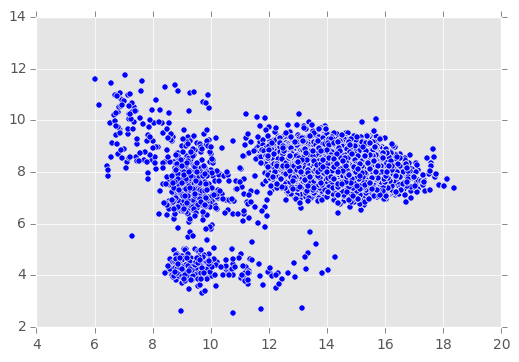

In [269]:
plt.scatter(features_eq["HIS319_CA to TYR75_CA"], features_eq["TYR336 to ASP114"])
plt.show()

In [ ]:
plt.scatter(bu72_pp_tica[:,0], bu72_pp_tica[:,5])

In [ ]:
importances

# import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

ks_matrix = compute_ks_matrix(bu72_pp_tica, tica_resampled)
ks_matrix

In [ ]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

#sr_matrix = compute_sr_matrix(bu72_pp_tica, tica_resampled)
print(sr_matrix)

sr_matrix = np.abs(sr_matrix)
print(sr_matrix[0,:])
print(sr_matrix[3,:])
rankings = np.zeros(np.shape(sr_matrix))
from scipy.stats import rankdata
for i in range(0, rankings.shape[0]):
    rankings[i,:] = sr_matrix.shape[0] + 1. - rankdata(sr_matrix[i,:], 'min')
rankings



In [ ]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

rs_matrix = compute_rs_matrix(bu72_pp_tica, tica_resampled)
print(rs_matrix)

rs_matrix = np.abs(rs_matrix)
print(rs_matrix[0,:])
print(rs_matrix[3,:])
rankings = np.zeros(np.shape(rs_matrix))
from scipy.stats import rankdata
for i in range(0, rankings.shape[0]):
    rankings[i,:] = rs_matrix.shape[0] + 1. - rankdata(rs_matrix[i,:], 'min')
rankings




In [ ]:
import entropy_estimators as ee

In [ ]:
tica_coords = verboseload(projected_features_dir)
np.shape(tica_coords[0])

In [ ]:
n_samples=10
save_dir = "%s/clusters100_samples10" % tica_dir
sampling_method = "random"
clusters_map_file = "%s/clusters100_map.h5" % tica_dir
sample_clusters(clusterer_dir, projected_features_dir, traj_dir, traj_ext, save_dir, n_samples, method = sampling_method, clusters_map_file = clusters_map_file)

In [ ]:
import analysis
reload(analysis)
from analysis import *
plot_all_tics_and_clusters(tica_dir, projected_features_dir, clusterer_dir, lag_time, label = "cluster_id", active_cluster_ids = range(0,n_clusters), intermediate_cluster_ids = [], inactive_cluster_ids = [])

In [ ]:
plot_timescales(clusterer_dir, n_clusters, tica_dir, list(range(1,25)))


In [ ]:
graph_file = "%s/msm_lag_time%d_graph.graphml" % (tica_dir, lag_time)
construct_graph(msm_model_dir, clusterer_dir, n_clusters, 5, 5, graph_file, inactive = None, active = None, pnas_clusters_averages = None, tica_clusters_averages = None, docking=None, macrostate = None)


In [ ]:
from imp import reload
import custom_msm
reload(custom_msm)
from custom_msm import *
msm_file = msm_model_dir
sampled_frames_file = "%s/msm100_frames.h5" %tica_dir
msm_trajectory_filename = "%s/msm100_1000frames" %tica_dir
make_msm_trajectory(msm_file, projected_features_dir, traj_dir, sampled_frames_file, clusterer_dir, msm_trajectory_filename, 
                    n_clusters, start_cluster=22, n_steps=1000)

In [ ]:
mytraj = md.load("/home/amir/Post_Process/GPCR/MOR/LIG_path/BU_path/h5_trajectories/rep_1.h5")

In [ ]:
dir(mytraj)

In [ ]:
del mytraj

In [ ]:
subset = crystal_structure.atom_slice(range(0,400))
subset.xyz
print(subset.xyz)
distances = md.compute_contacts(subset)
print(distances)


In [ ]:
distances0 = distances[0]

In [ ]:
distances0 = np.nan_to_num(distances0)

In [ ]:
distances0

In [ ]:
np.where(distances0 > 0.0)